# Pulsar tutorial for the African Radio Interferometry Winter School
#### June blah to blah
Hosted by Marisa Geyer

# Data detective work!

It is Monday morning and unanalysed MeerKAT data from a distant source has landed on your desk. 


You roll up your sleeves.

It is time to dig in and find what mysteries it is hiding.




## Step 1: Getting your toolkit ready

Luckily this is not your first day on job. As a seasoned astronomer, you already suspect which tools will be most useful to you. 
You compile a list of software to load in, and press GO!

**Action 1:** load the below cell to import the necessary software tools to use on the newly received data

In [1]:
##%reset
import os
import sys
import glob
import random
import subprocess
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context('talk')
import psrchive
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath('../scripts/'))
import psrchive_utils as psru


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

plt.rcParams['figure.figsize'] = (8.0, 8.0)
my_cmap = random.choice(['viridis', 'magma','gist_heat','jet', 'plasma', 'seismic'])
print my_cmap

magma


In [46]:
def time_per_bin(archive):
    ephem = archive.get_ephemeris()
    time = 1.0/float(ephem.get_value('F0'))
    time_per_bin = time/archive.get_nbin()
    return time_per_bin

## Step 2: Load the bits

The weekend observer on duty, has copied the unanalysed data to your shared drive.

**Action 2:** point your CoLab notebook to where the data is stored, and load it using *psrchive*

In [47]:
mydata_dir = '/scratch01/mgeyer/ARIWS/double_pulsar_data/eclipse_data_uhf/fold_data'
datafile = 'J0737-3039A_2021-01-28-00:37:28_zap.p.f2'

path_to_data = os.path.join(mydata_dir, datafile)
print(path_to_data)

/scratch01/mgeyer/ARIWS/double_pulsar_data/eclipse_data_uhf/fold_data/J0737-3039A_2021-01-28-00:37:28_zap.p.f2


In [48]:
arch = psrchive.Archive_load(path_to_data)
arch.remove_baseline()
data_cube = arch.get_data()[:,0,:,:] ## keeping the full resolution data for later

### Note! If you make mistakes down the line with your detective work, then you can come back to Step 2 to load the data freshly again. 

## Step 3: Data dimensions

To get a better feel for the data you have, you make notes of the characteristics stored in the data header.

In [4]:
print "The data was captured on", arch.start_time(), "with", arch.get_telescope()
print "The observation lasted for", arch.integration_length(), "seconds\n"

print "And has the following characteristics:"
print "Number of frequency channels\t\t\t", arch.get_nchan()
print "Number of subintegrations (time packets)\t", arch.get_nsubint()

The data was captured on PSRCHIVE MJD: 59242:003732.949629178074030 with MeerKAT
The observation lasted for 1799.34451012 seconds

And has the following characteristics:
Number of frequency channels			512
Number of subintegrations (time packets)	226


**Q1:** Using the above information how much observing time is associated with each subintegration (or time packet)?

In [5]:
time_per_subint = arch.integration_length()/arch.get_nsubint()
print time_per_subint, "seconds"

7.9617013722 seconds


## Step 4: Observing band

These days MeerKAT boasts more than one receiver, each with their own observing frequencies. 

Better check, which observing band was used for the observation you are analysing. 

You decide the quickest way is to see what frequencies (in MHz) are associated data you have loaded, and find

In [6]:
freqs = arch.get_frequencies()
print freqs, "in MHz"

[ 544.265625  545.328125  546.390625  547.453125  548.515625  549.578125
  550.640625  551.703125  552.765625  553.828125  554.890625  555.953125
  557.015625  558.078125  559.140625  560.203125  561.265625  562.328125
  563.390625  564.453125  565.515625  566.578125  567.640625  568.96875
  569.765625  570.5625    572.15625   572.953125  574.015625  575.078125
  576.140625  577.203125  578.265625  579.328125  580.390625  581.453125
  582.515625  583.578125  584.640625  585.703125  586.765625  587.828125
  588.890625  589.953125  591.015625  592.078125  593.140625  594.203125
  595.265625  596.328125  597.390625  598.453125  599.515625  600.578125
  601.640625  602.703125  603.765625  604.828125  605.890625  606.953125
  608.015625  609.078125  610.140625  611.203125  612.265625  613.328125
  614.390625  615.453125  616.515625  617.578125  618.640625  619.703125
  620.765625  621.828125  622.890625  623.953125  625.015625  626.078125
  627.140625  628.203125  629.265625  630.328125  63

**Q2**: Which observing band is this? U-band or L-band?

In [7]:
print "U-band"

U-band


## Step 5: A first plot

Now that you know the dimensions of your data, you decide it's best to have a visual look at it.
If you add all the data in time - the signal will be the brightest. 

*psrchive* has a list of "scrunch" commands to add signals in different dimensions:

- fscrunch
- tscrunch
- bscrunch

**Q2**: Which *psrchive* scrunch command do you think would add (integrate) the data in time?

Your data now has 1 time blocks with 1024 data bins


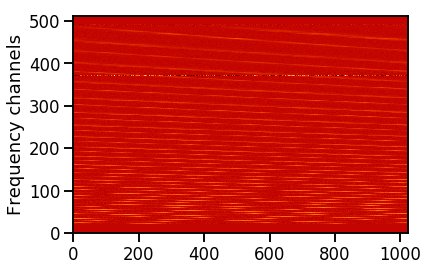

In [8]:
arch.tscrunch() ## add your scrunching command here to add the data in time 

## You can check if you have used the correct scrunch command, by double checking that the subintegration (time blocks) is now equal to one. 
## If not! You've probably used the wrong scrunch command, and it's best to load the data newly by running from Step 2

print "Your data now has %d time blocks with %d data bins" %(arch.get_nsubint(), arch.get_nbin())

data = arch.get_data()

data = data.reshape(len(freqs),arch.get_nbin())
plt.imshow(data, aspect='auto', cmap=my_cmap, origin='lower')
label = plt.ylabel("Frequency channels")

In [ ]:
### psrchive unload - make RFI worse

In [9]:
# data_w= psru.apply_freq_weights(arch)
# plt.imshow(data_w, aspect='auto', cmap='magma', origin='lower')
# label = plt.ylabel("Frequency channels")

In [10]:
np.shape(data)

(512, 1024)

Which channel numbers do you think contain the artificial signals?

It might help if you zoom in to the plot by picking y-axis limits

(365, 375)

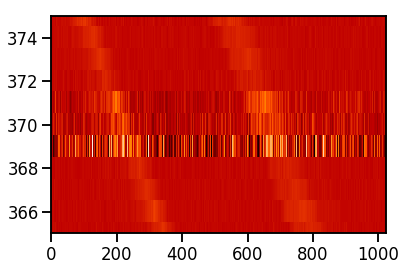

In [11]:
zoom_in_lower = 365
zoom_in_upper = 375
plt.imshow(data, aspect='auto', cmap=my_cmap, origin='lower')
plt.ylim(zoom_in_lower, zoom_in_upper)

## Step 5: removing Radio Frequency Interference

Choose the range of frequency channels that you want to deleted (set to zero) because you think they contain Radio Frequency Interference and not astronomical signals



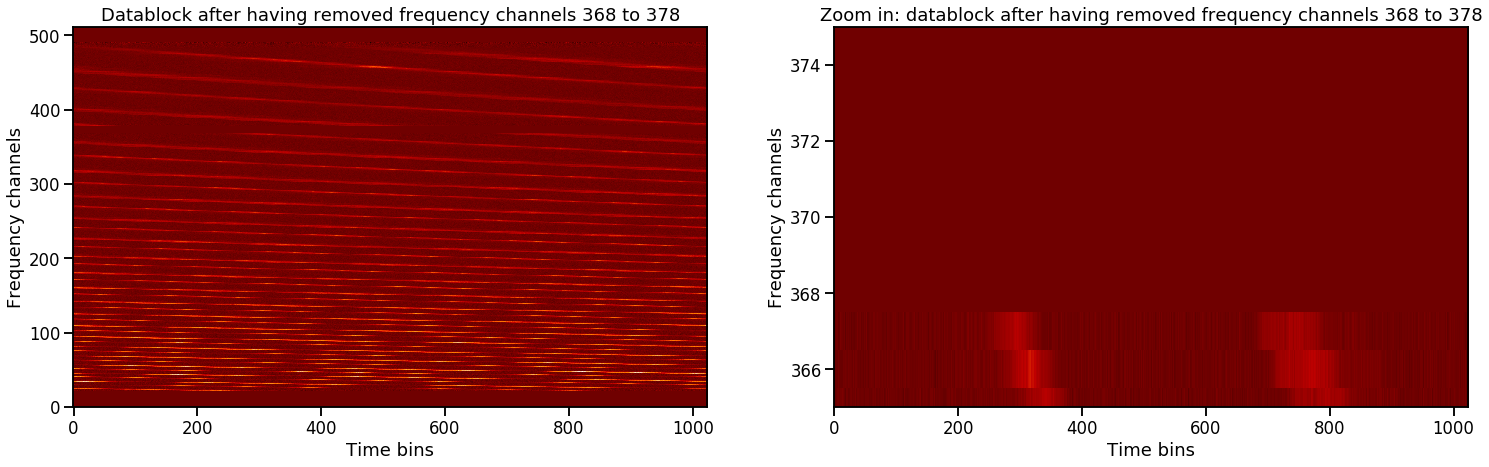

In [12]:
#channel_start = 737
#channel_end = 750
channel_start = 368
channel_end = 378

data[channel_start:channel_end,:] = 0

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,7))
ax1.set_title("Datablock after having removed frequency channels %d to %d" %(channel_start, channel_end))
ax1.imshow(data, aspect='auto', cmap=my_cmap, origin='lower')
labely = ax1.set_ylabel("Frequency channels")
labelx = ax1.set_xlabel("Time bins")

ax2.set_title("Zoom in: datablock after having removed frequency channels %d to %d" %(channel_start, channel_end))
ax2.imshow(data, aspect='auto', cmap=my_cmap, origin='lower')
ax2.set_ylim(zoom_in_lower, zoom_in_upper)
labely = ax2.set_ylabel("Frequency channels")
labelx = ax2.set_xlabel("Time bins")

(0, 40)

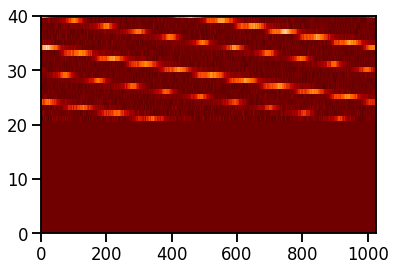

In [13]:
plt.imshow(data, aspect='auto', cmap=my_cmap, origin='lower')
#plt.ylim(0, 40)

Do the rest of the signals now look brighter to you than before?
If you see more RFI you can remove even more frequency channels to get a further increase in brightness"

In [14]:
data[485:500,:] = 0
data[21:27,:] = 0

## Step 6: Why is the signal smearing?

Now that you are happy that you have removed the interference, you decide to make a proper plot for keep's sake.

With frequency labelling in MHz rather than channel numbers.

Luckily you've already created 'freq' which contains the frequencies in MHz for each channel. 

So you simply change the extent of the plot to go from the first frequency channel to the last, like so:

In [15]:
#freqs

Text(0.5,0,'Time bins')

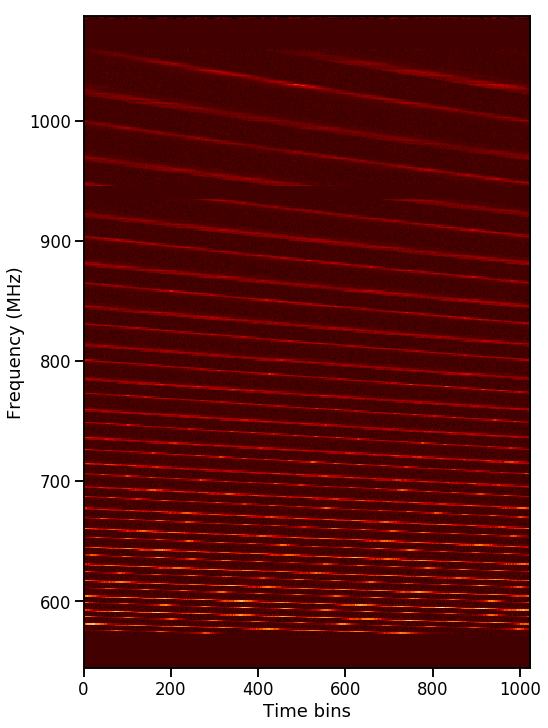

In [16]:
plt.figure(figsize=(8,12))
plt.imshow(data, extent=(0,1023,freqs[0], freqs[-1]), aspect='auto', cmap=my_cmap, origin='lower')
plt.ylabel("Frequency (MHz)")
plt.xlabel("Time bins")

a single signal appears to arrive at a higher frequency, and is then travels to a lower frequency in time

this rings a bell!

You zoom into to look more closely

(0, 1.0)

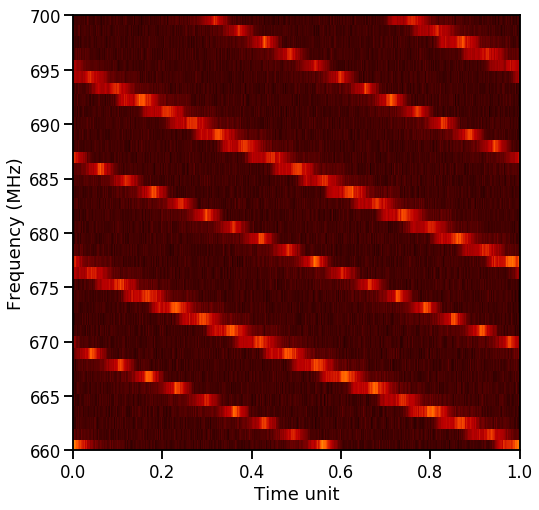

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(data, extent=(0,1,freqs[0], freqs[-1]), aspect='auto', cmap=my_cmap, origin='lower')
plt.ylabel("Frequency (MHz)")
plt.xlabel("Time unit")
plt.ylim(660,700)
plt.xlim(0,1.0)

## Step 7: Of course it's a ......

**Q3:** What is causing the smear across frequency?

**Q4:** And why is the signal wrapping?

+ pulsar
+ Q3: dispersion by the ISM
+ Q4: the data has been folded on the pulsar's period!


Aha, now that you know it is a pulsar, you can see that the data has already been folded on the pulse period of the pulsar
making the siganl wrap around. 

So if you know how much time in seconds each time bin represents you can compute the pulseperiod.

Luckily,  this is written into the metadata of the datafile so you check:

In [19]:
time_resolution = time_per_bin(arch) ### psrchive.get_Integration()[0].get_folding_period()

print "Each bin within the time block which has %d bins, represents % seconds" %(arch.get_nbin(), time_resolution)
print "Wow, the telescope is performing! Capturing data every %.0f microseconds" %(time_resolution*1e6)

Each bin within the time block which has 1024 bins, represents 2.2167362215e-05econds
Wow, the telescope is performing! Capturing data every 22 microseconds


You are really zoning in on this mystery now. 

Once you know the pulsar period you are well on your way to figuring out which source this is!

**Q5:** What does your back of the envelope calculation give for the period of this periodic source?

######## thinking out load - maybe it will be good to have nbins 512 before starting so that nchan and nbin are not equal. 

In [20]:
period = arch.get_nbin()*time_resolution
ms_period = period*1000
print "The pulsar has a rotational period of %.4f seconds" %period
print "or %.2f miliseconds" %ms_period

The pulsar has a rotational period of 0.0227 seconds
or 22.70 miliseconds


## Step 8: Estimate the disperison measure

To align the pulsar signal, you know you have to get rid of this smearing effect.

For which, paging through your notebook, you have to compute the dispersion measure - which relates the amount of frequency smear for a given time



The delay, $\Delta t$, in seconds, between the arrival times of pulses at frequencies, $\nu_{lo}$ and $\nu_{hi}$ is given by
\begin{equation}
\Delta t = 4.149\times10^3 \biggl(DM\biggr) \biggl[\frac{1}{\nu_{lo}^{2}}-\frac{1}{\nu_{hi}^{2}}\biggr]
\end{equation}

where $\nu_{lo}$ and $\nu_{hi}$ are in MHz, 

or 

\begin{equation}
DM = \frac{\Delta t}{4.149\times10^3} \frac{\nu_{lo}^{2} \nu_{hi}^{2}}{\nu_{hi}^{2}-\nu_{low}^{2}}
\end{equation}

So if you can estimate the characteristic smearing, or dispersion measure (DM), then you can properly align the pulsar signal.

Using the time delay as the pulse period estimate a high frequency where the signal starts and a low frequency value where the signal ends 

(660, 700)

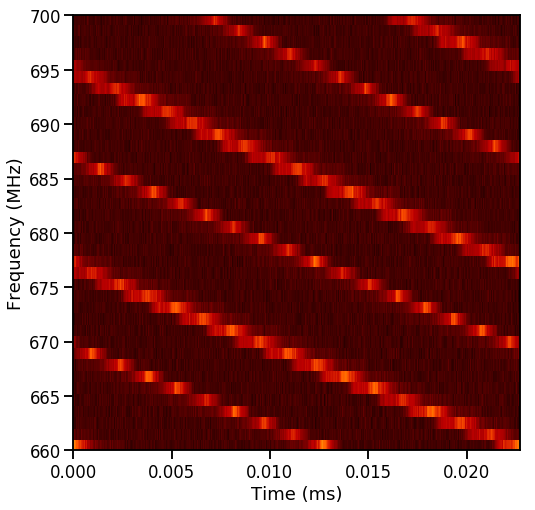

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(data, extent=(0,period,freqs[0], freqs[-1]), aspect='auto', cmap=my_cmap, origin='lower')
plt.ylabel("Frequency (MHz)")
plt.xlabel("Time (ms)")
plt.ylim(660,700)

In [22]:
freq_hi =695.0
freq_low = 677.0

const = 4149
DM = period/const*(freq_hi**2*freq_low**2)/(freq_hi**2 - freq_low**2)
print DM

49.0445630443


In [31]:
def rotate_array(arr, nbins):
    return [arr[(nbins + i) % len(arr)] for i in range(len(arr))]


def correct_dispersion(data, freqs,DM, period):
    nchan, nbin = np.shape(data)
    DMcorr_data=np.zeros((nchan,nbin),dtype=float)

    center_freq=np.median(freqs)

    for chan in range(nchan):
 
        data_chan = data[chan]
        freq_chan = freqs[chan]
        print "To correct the dispersion of frequency channel %d, associated with %.2f MHz, relative to the centre frequency %.2f MHz" %(chan,freq_chan,center_freq)

        shift_sec = const*DM*(1/freq_chan**2 - 1/center_freq**2)
        shift_bins = int(shift_sec*nbin/period)
        
        print "we shif the data by %.4f seconds or %d data bins" %(shift_sec,shift_bins)

        # rotate the data by the number of bins
        data_shifted=rotate_array(data_chan,shift_bins)

        DMcorr_data[chan,:]=data_shifted
    
    return DMcorr_data

In [32]:
DMcorr_data=correct_dispersion(data,freqs,DM-0.13,period)

To correct the dispersion of frequency channel 0, associated with 544.27 MHz, relative to the centre frequency 815.73 MHz
we shif the data by 0.3801 seconds or 17147 data bins
To correct the dispersion of frequency channel 1, associated with 545.33 MHz, relative to the centre frequency 815.73 MHz
we shif the data by 0.3775 seconds or 17027 data bins
To correct the dispersion of frequency channel 2, associated with 546.39 MHz, relative to the centre frequency 815.73 MHz
we shif the data by 0.3748 seconds or 16907 data bins
To correct the dispersion of frequency channel 3, associated with 547.45 MHz, relative to the centre frequency 815.73 MHz
we shif the data by 0.3722 seconds or 16788 data bins
To correct the dispersion of frequency channel 4, associated with 548.52 MHz, relative to the centre frequency 815.73 MHz
we shif the data by 0.3695 seconds or 16670 data bins
To correct the dispersion of frequency channel 5, associated with 549.58 MHz, relative to the centre frequency 815.73 MH

To correct the dispersion of frequency channel 487, associated with 1061.70 MHz, relative to the centre frequency 815.73 MHz
we shif the data by -0.1249 seconds or -5636 data bins
To correct the dispersion of frequency channel 488, associated with 1062.77 MHz, relative to the centre frequency 815.73 MHz
we shif the data by -0.1253 seconds or -5652 data bins
To correct the dispersion of frequency channel 489, associated with 1063.83 MHz, relative to the centre frequency 815.73 MHz
we shif the data by -0.1257 seconds or -5668 data bins
To correct the dispersion of frequency channel 490, associated with 1064.89 MHz, relative to the centre frequency 815.73 MHz
we shif the data by -0.1260 seconds or -5685 data bins
To correct the dispersion of frequency channel 491, associated with 1065.95 MHz, relative to the centre frequency 815.73 MHz
we shif the data by -0.1264 seconds or -5701 data bins
To correct the dispersion of frequency channel 492, associated with 1067.02 MHz, relative to the cen

## Step 9: Adding all the frequency channels now that the dispersion is corrected, gives you the pulsar profile

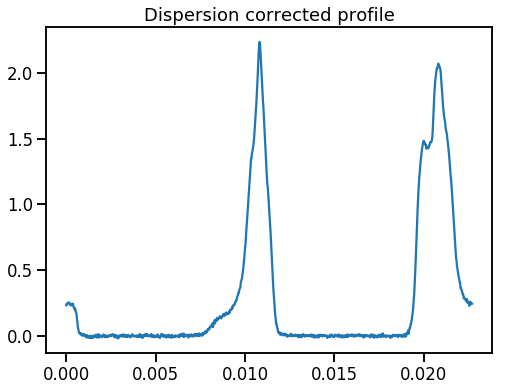

Good thing we did the dedispersion, without it the signal would look much worse:


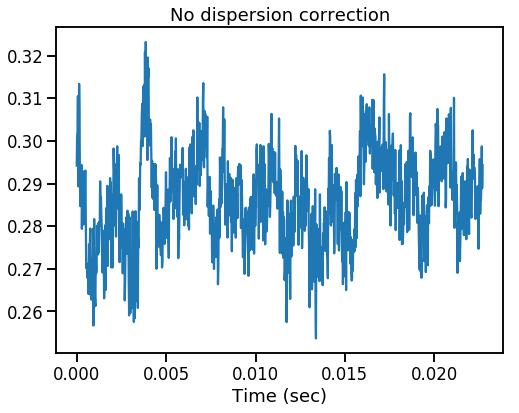

In [35]:
plt.figure(figsize=(8,6))
plt.title("Dispersion corrected profile")
plt.plot(np.linspace(0,period,1024), np.sum(DMcorr_data, axis=0))
plt.show()

plt.figure(figsize=(8,6))
print "Good thing we did the dedispersion, without it the signal would look much worse:"
plt.title("No dispersion correction")
plt.plot(np.linspace(0,period,1024), np.sum(data, axis=0))
xlab=plt.xlabel("Time (sec)")

What an interesting pulse shape - we see two peaks! This must mean we are seeing both the North pole and South pole of this pulsar.

So the pulse profile is what we get after adding all the observing time together and all the frequencies, and correcting for the dispersion.

# SCRATCH PAD

In [36]:
#timeblocks, frquency
np.shape(data_cube)

(226, 512, 1024)

In [37]:
from matplotlib import animation
#matplotlib.rcParams['animation.writer'] = 'ffmpeg'

In [55]:
# %%capture

# fig = plt.figure()
# ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
# line, = ax.plot([], [], lw=2)

# # initialization function: plot the background of each frame
# def init():
#     line.set_data([], [])
#     return line,

# # animation function.  This is called sequentially
# def animate(i):
#     x = np.linspace(0, 2, 1000)
#     y = np.sin(2 * np.pi * (x - 0.01 * i))
#     line.set_data(x, y)
#     return line,

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=200, interval=20, blit=True)

In [56]:
# fig, axs = plt.subplots(4,5, figsize=(25,7))
# for i in range(20):    
#     axs[i].plot(data_times[i])

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def timeblock(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

In [47]:
#HTML(anim.to_html5_video())

In [49]:
mydata_dir = '/scratch01/mgeyer/ARIWS/double_pulsar_data/eclipse_data_uhf/fold_data'
datafile = 'J0737-3039A_2021-01-28-00:37:28_zap.p.f2'

path_to_data = os.path.join(mydata_dir, datafile)
arch2 = psrchive.Archive_load(path_to_data)

In [50]:
arch2.remove_baseline()
arch2.dedisperse()
arch2.fscrunch()

data2 = arch2.get_data().reshape(226,1024)
print np.shape(data2)

(226, 1024)


In [51]:
#np.savetxt("time_series.txt", data2)

In [54]:
pwd

u'/scratch01/mgeyer/ARIWS/notebooks'

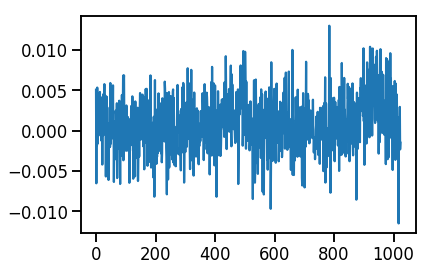

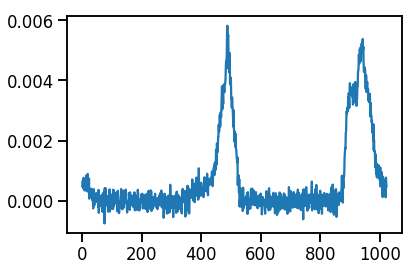

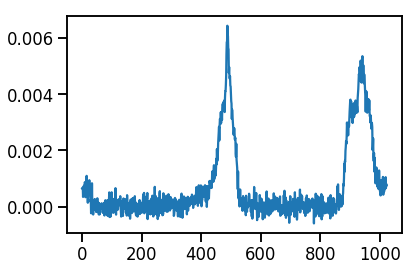

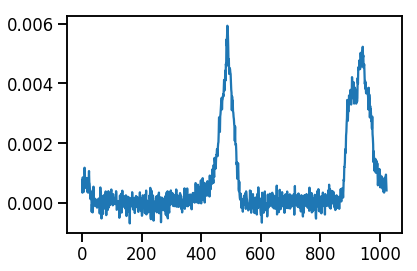

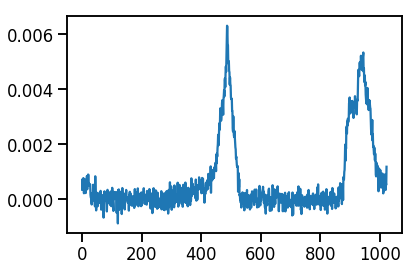

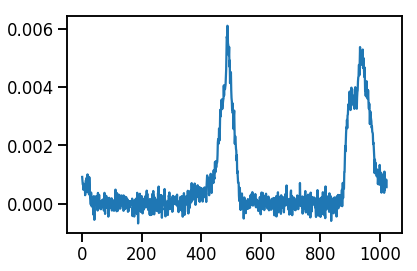

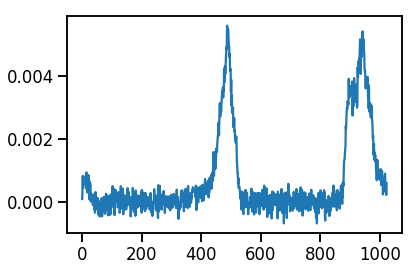

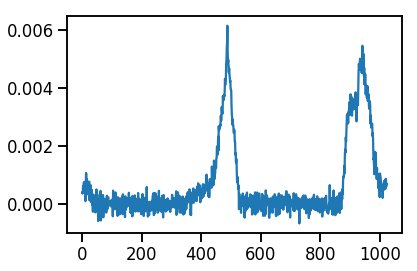

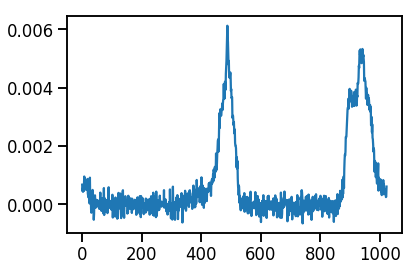

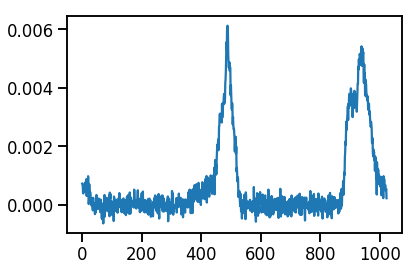

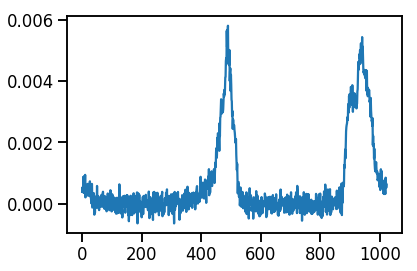

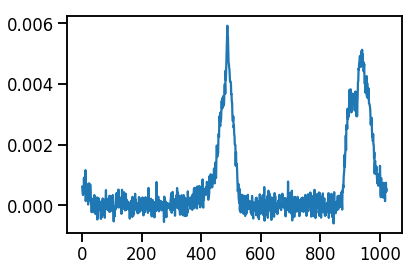

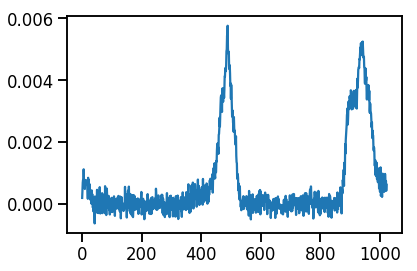

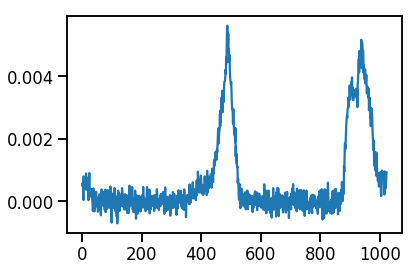

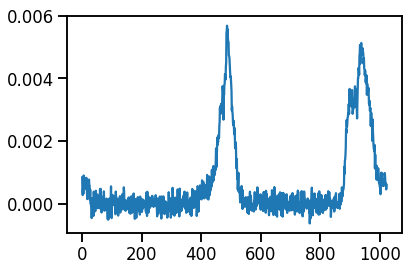

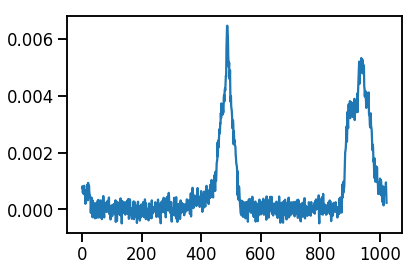

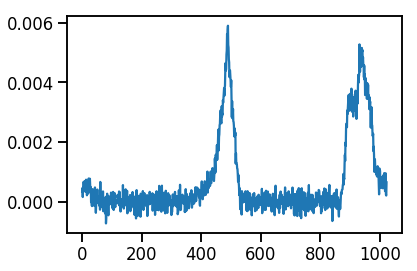

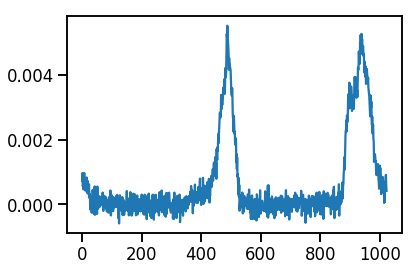

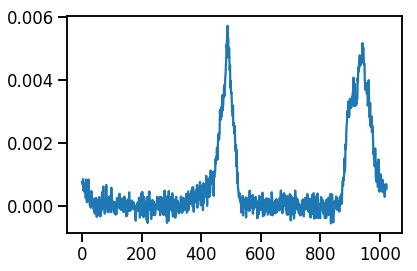

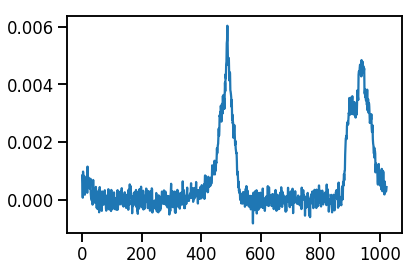

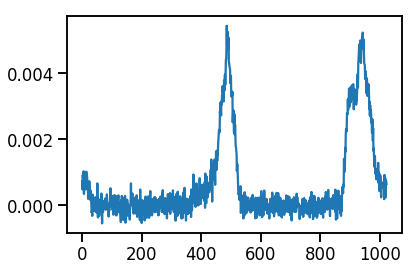

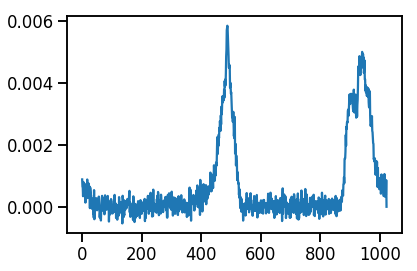

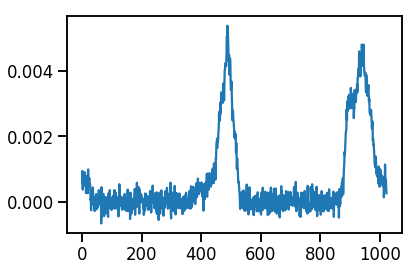

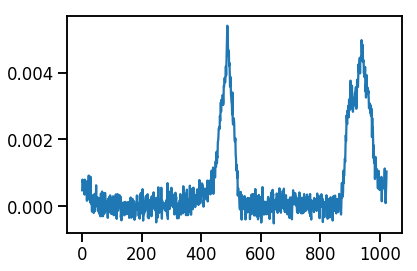

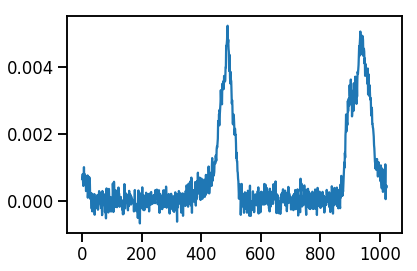

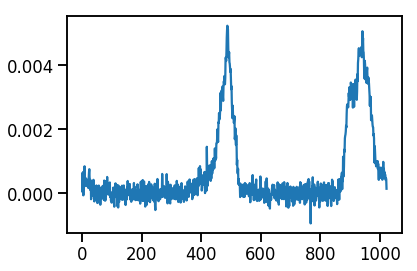

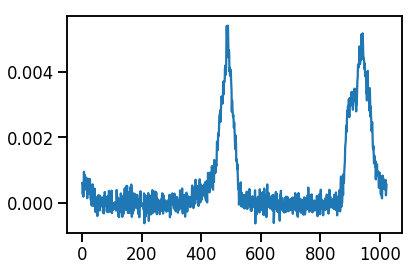

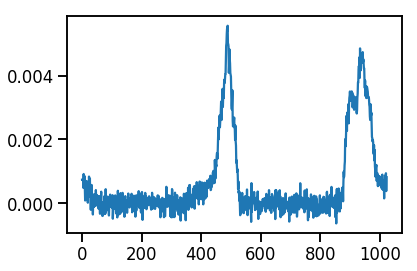

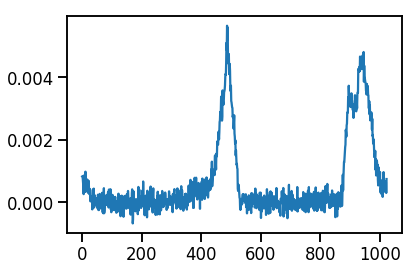

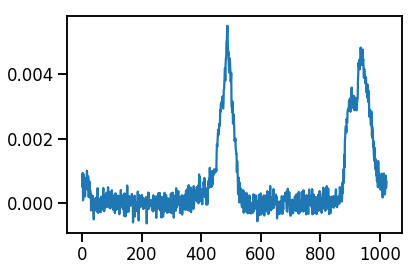

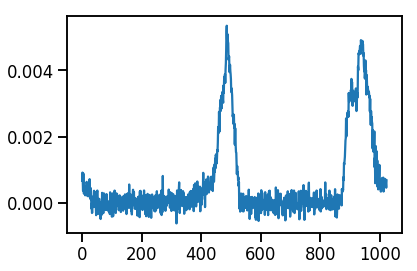

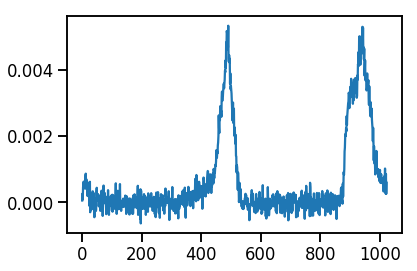

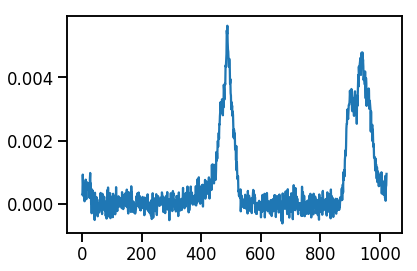

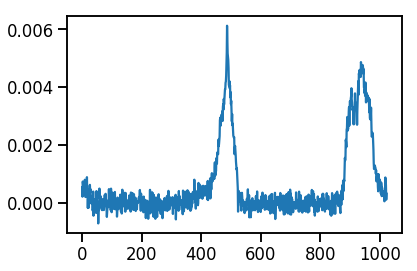

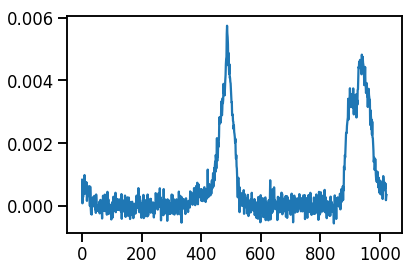

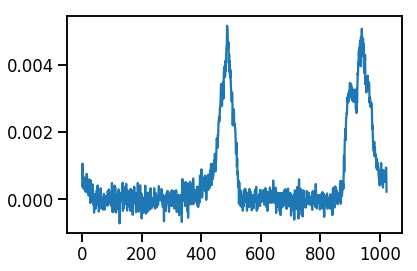

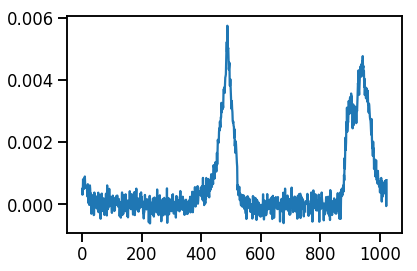

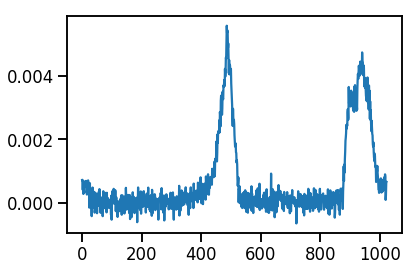

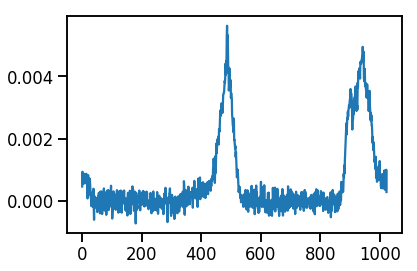

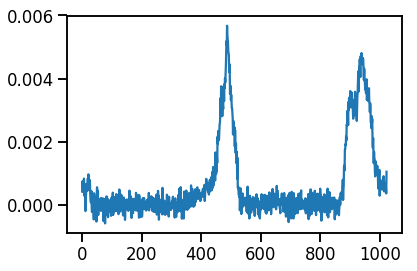

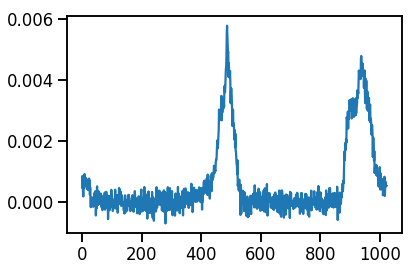

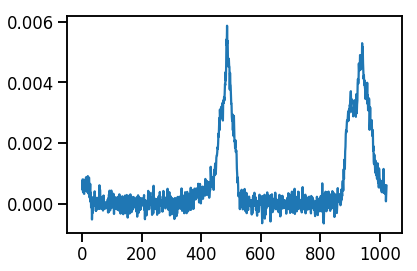

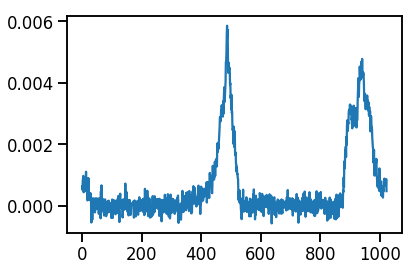

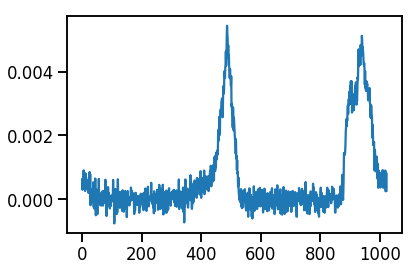

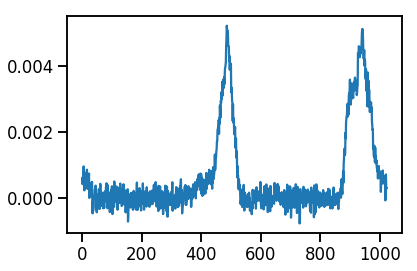

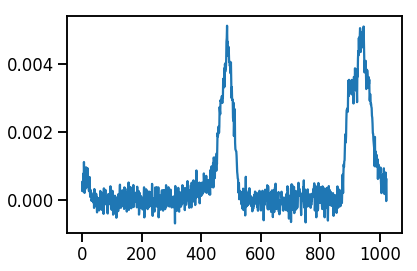

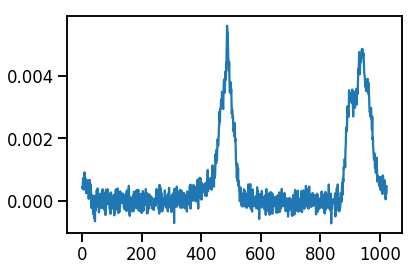

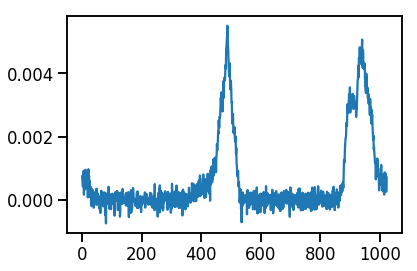

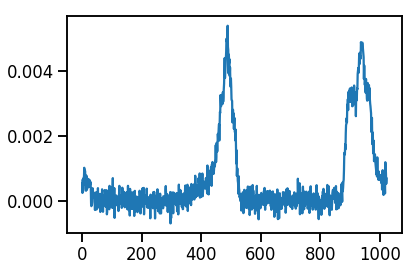

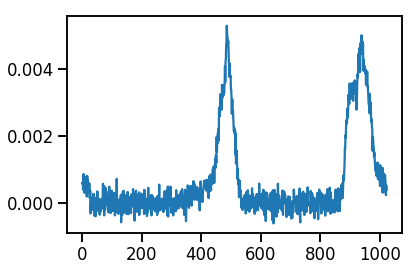

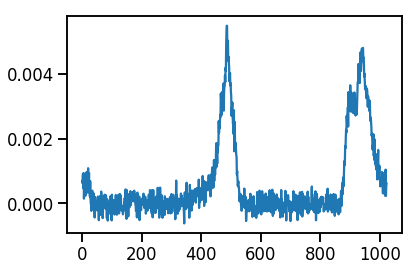

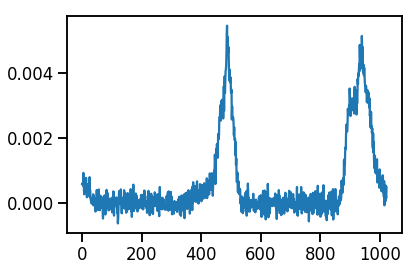

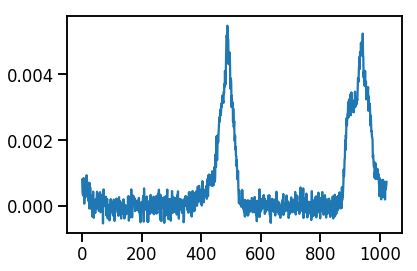

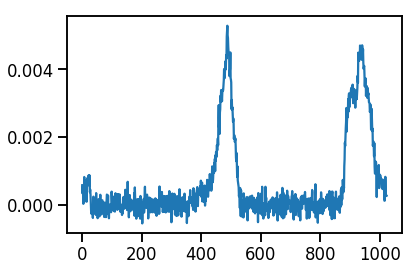

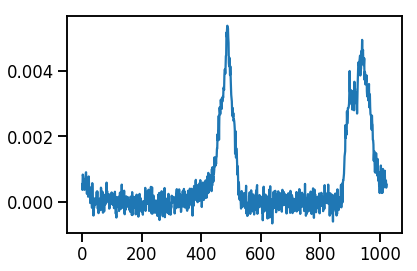

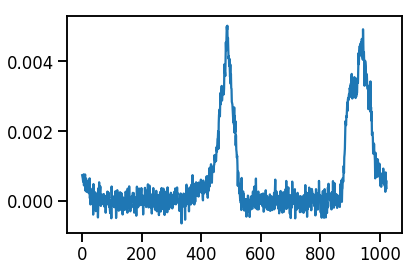

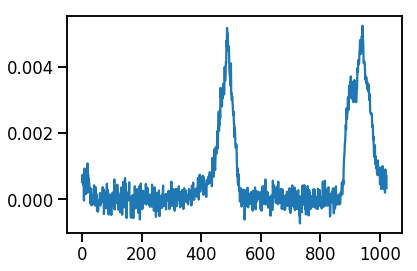

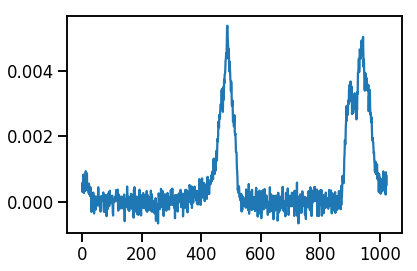

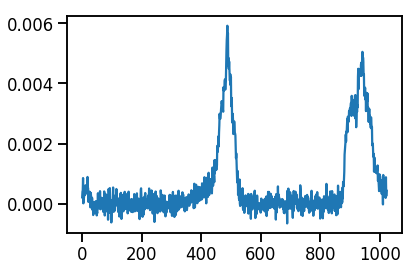

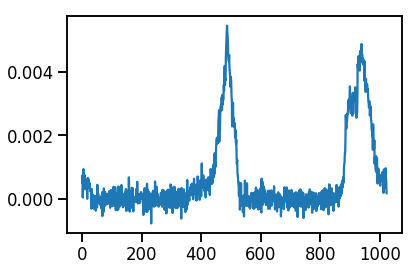

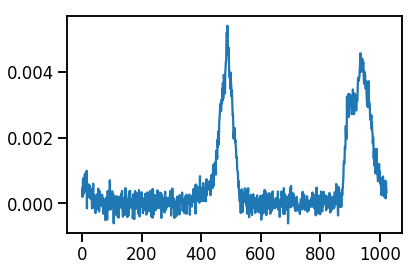

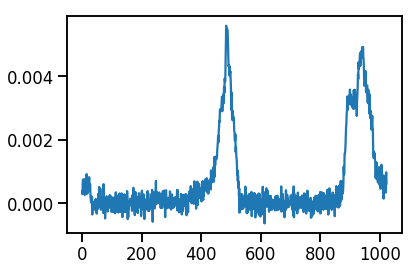

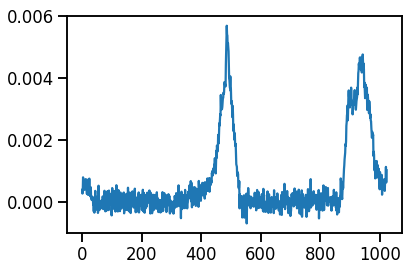

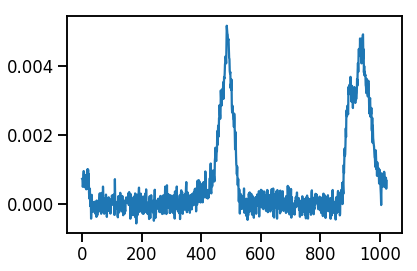

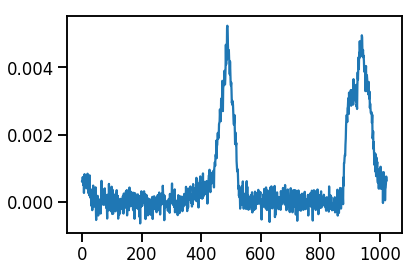

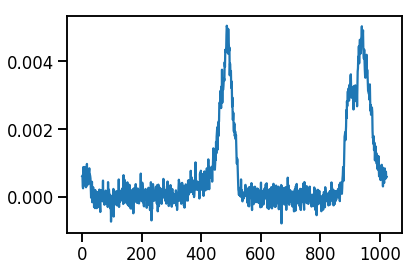

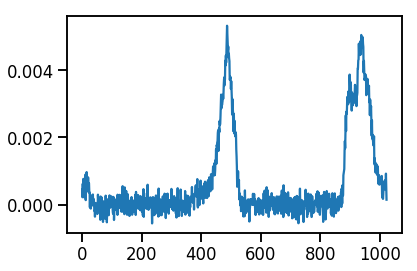

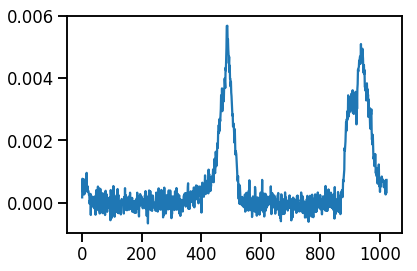

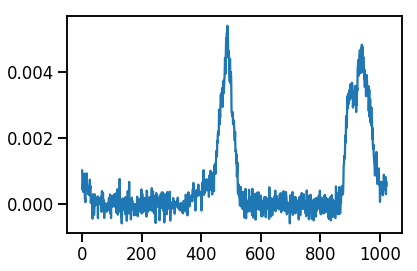

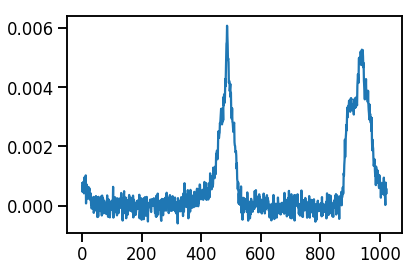

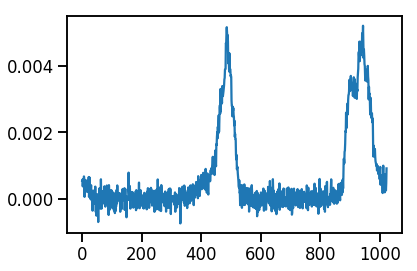

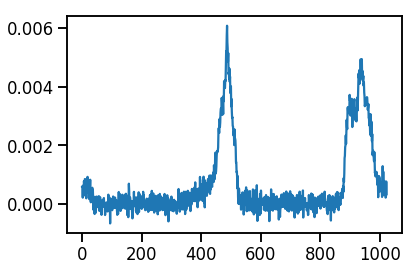

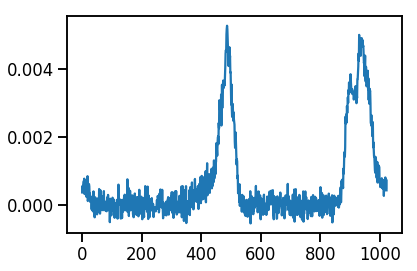

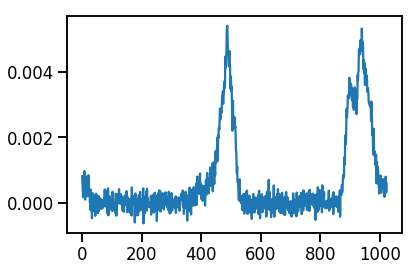

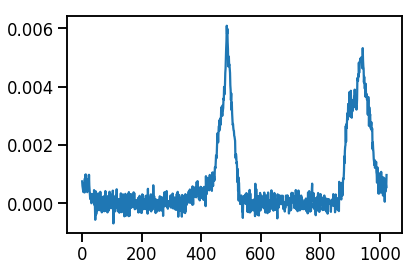

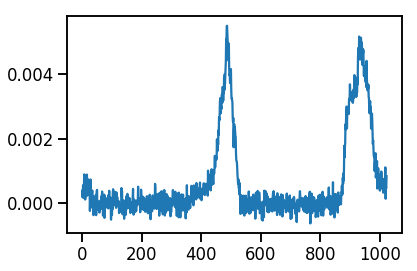

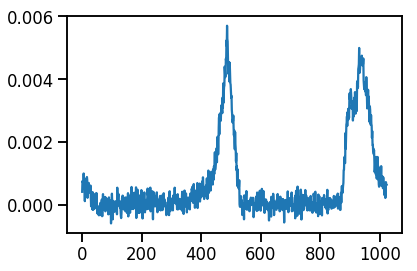

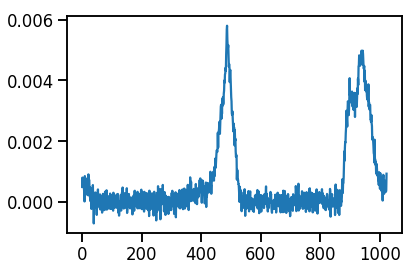

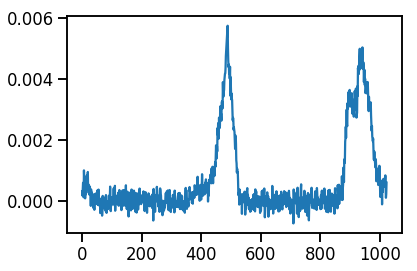

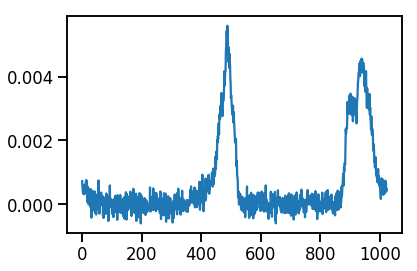

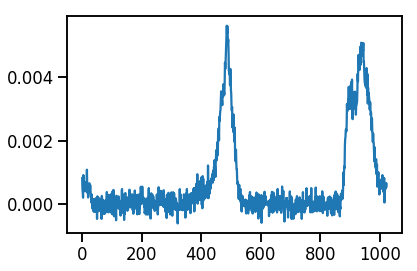

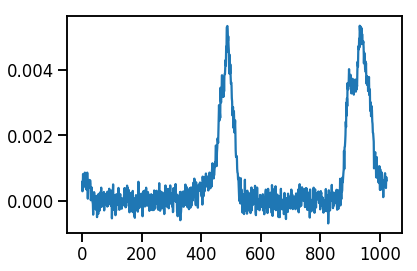

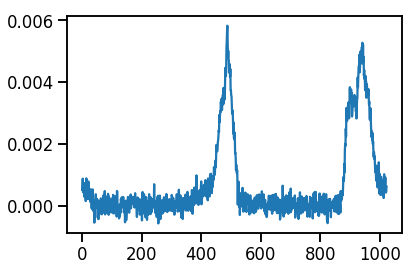

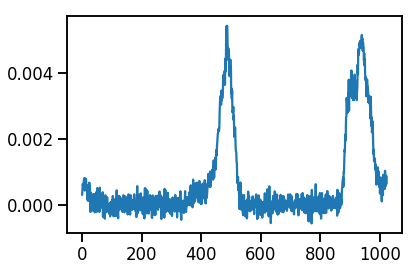

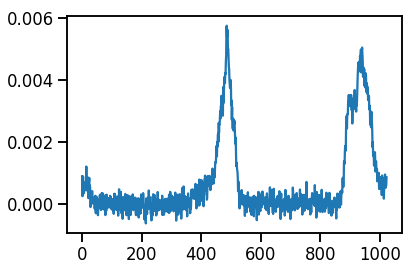

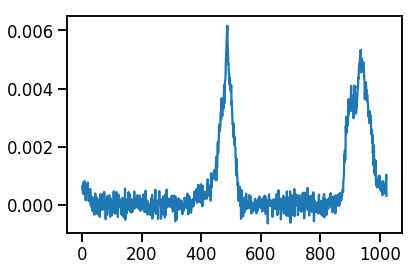

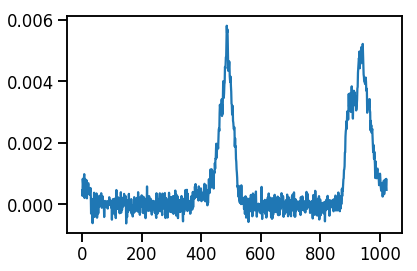

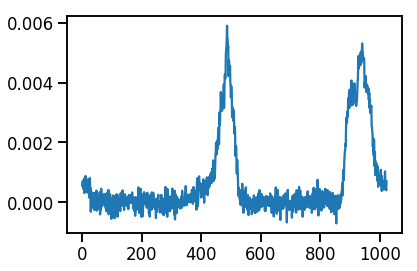

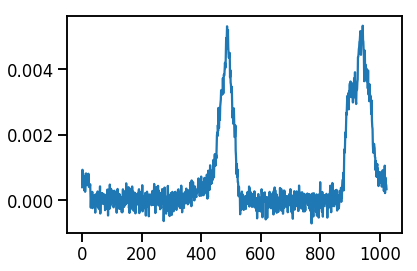

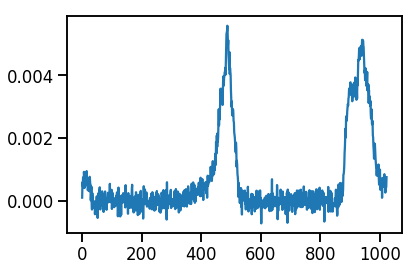

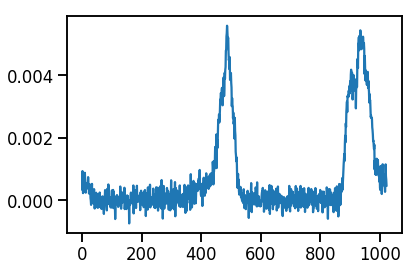

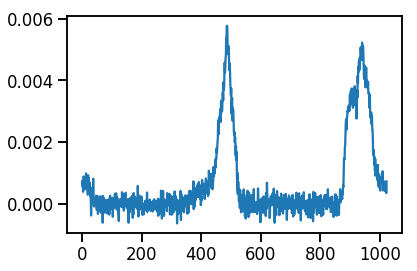

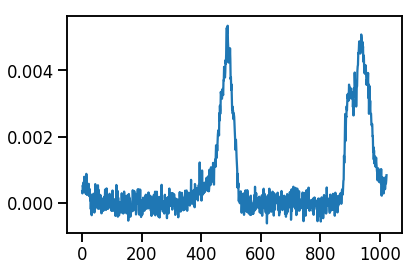

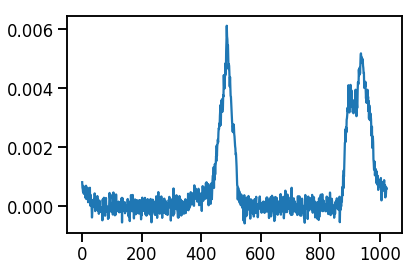

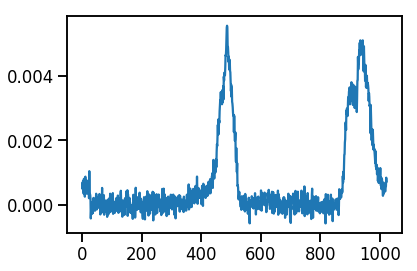

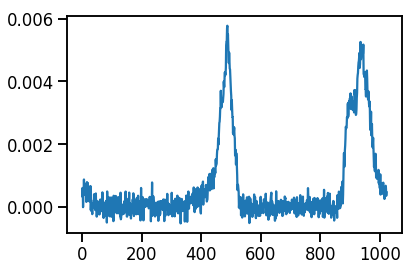

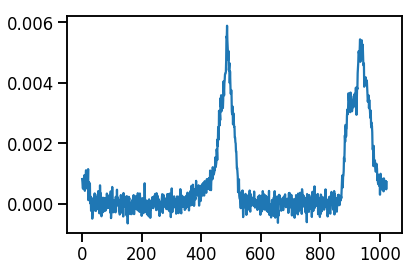

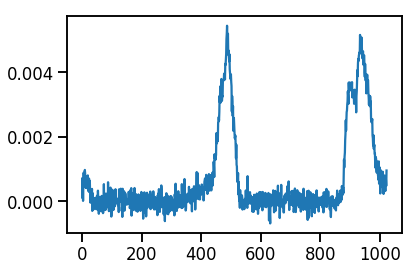

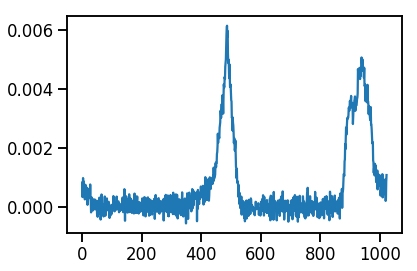

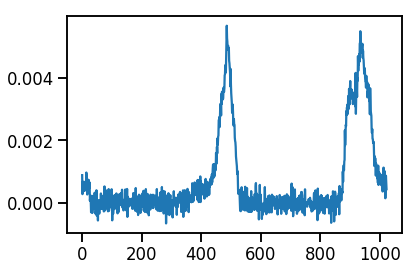

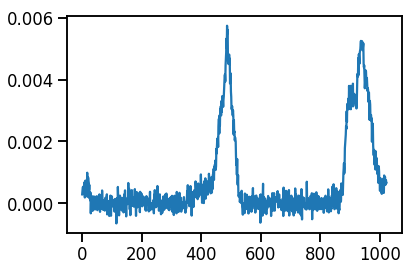

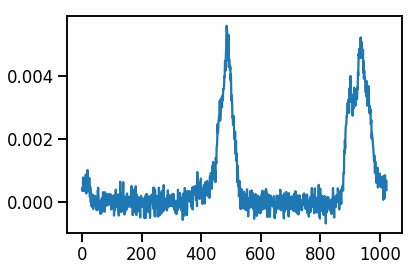

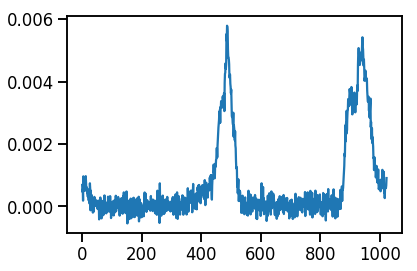

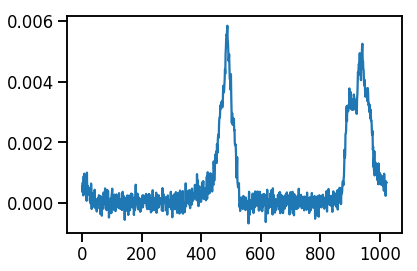

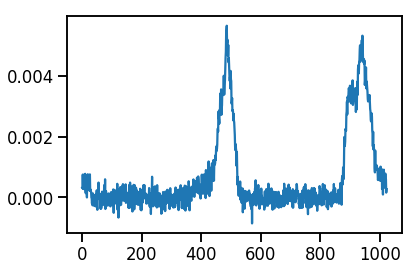

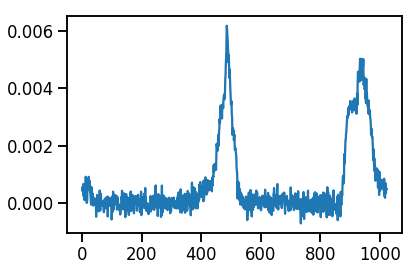

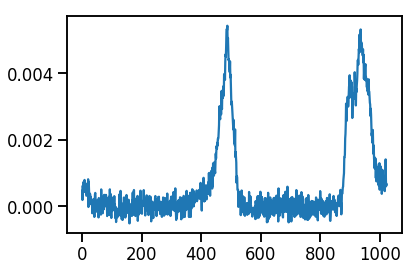

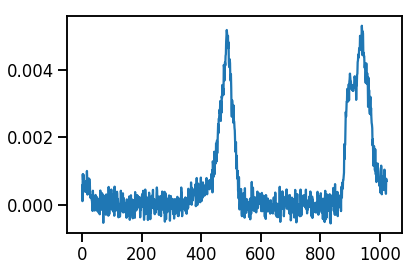

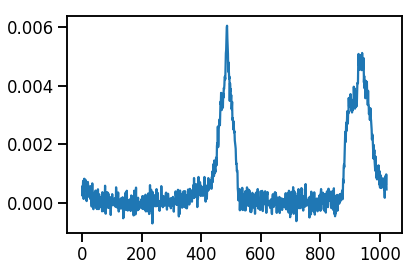

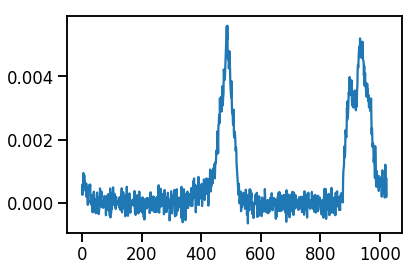

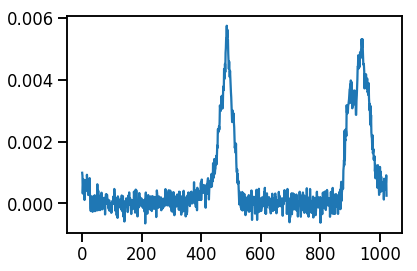

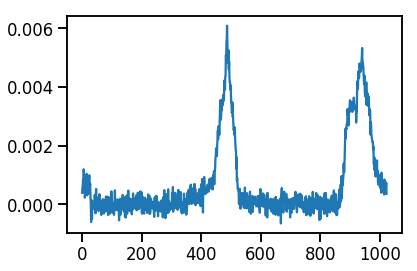

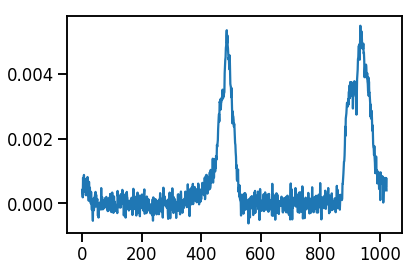

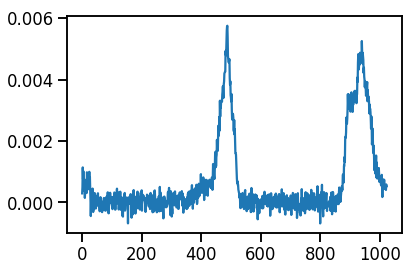

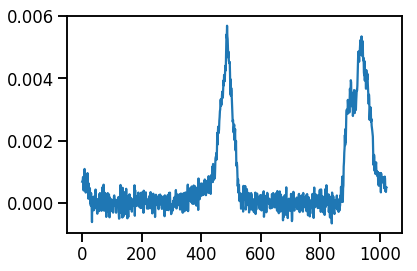

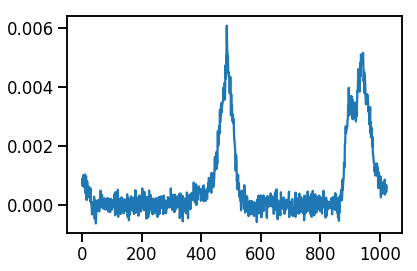

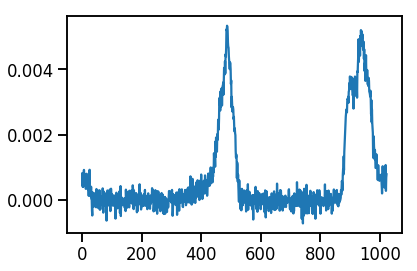

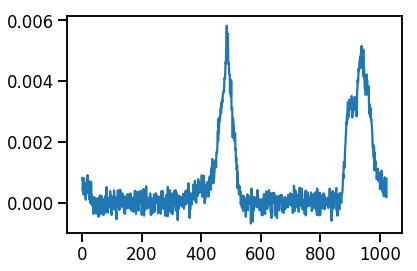

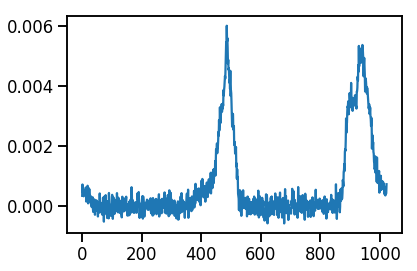

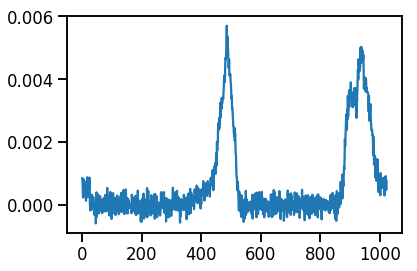

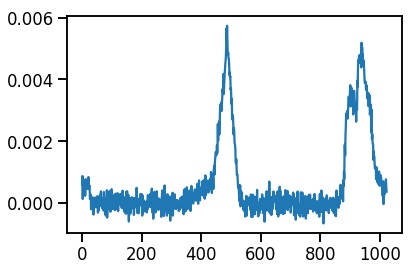

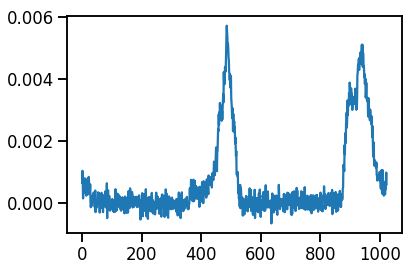

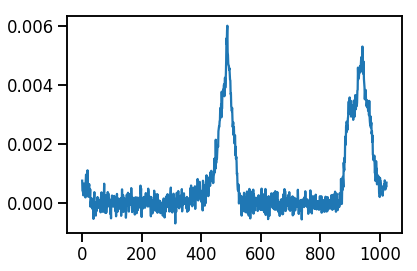

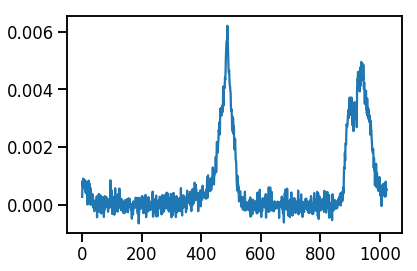

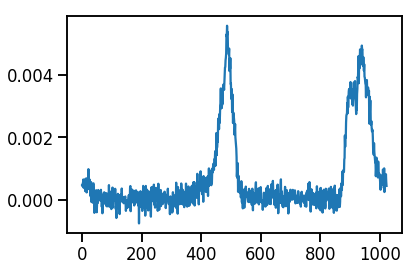

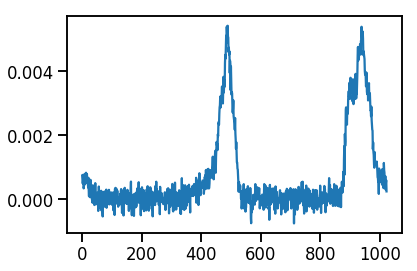

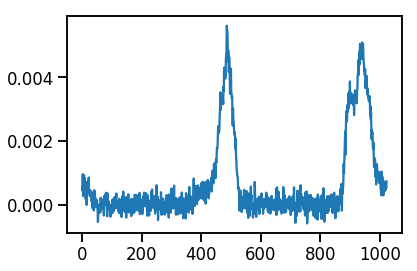

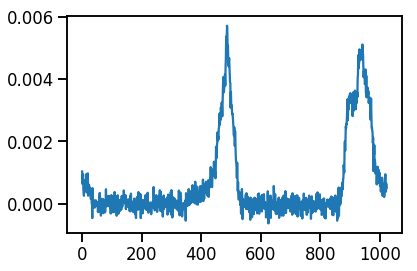

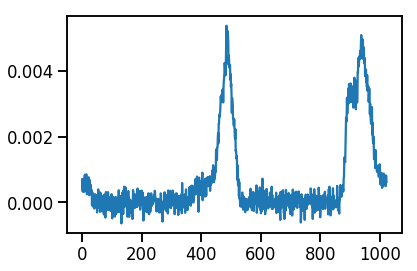

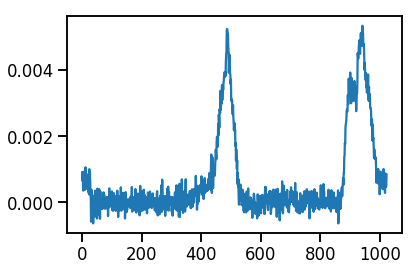

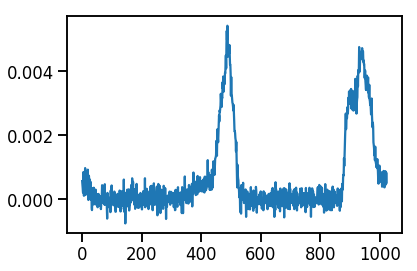

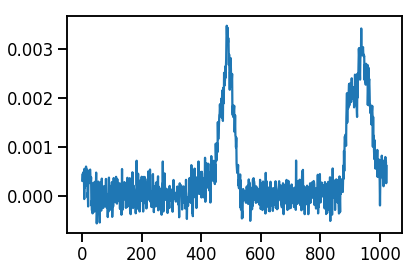

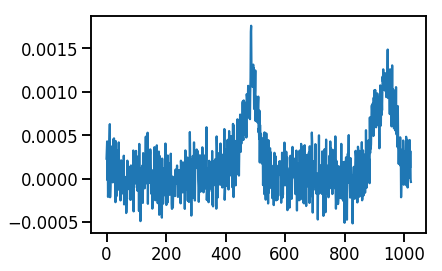

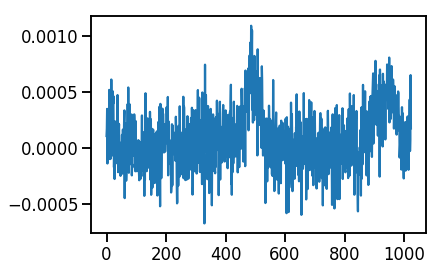

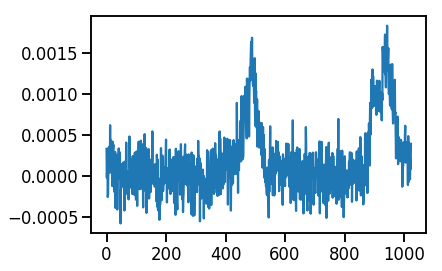

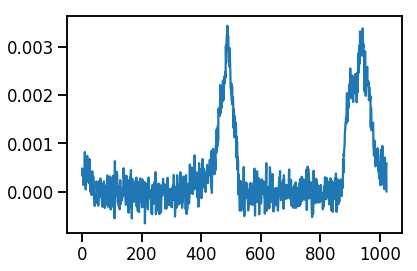

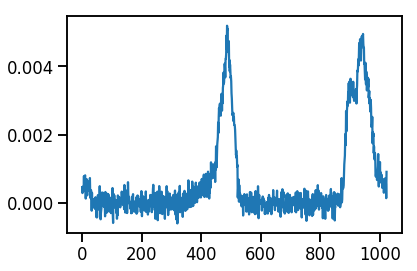

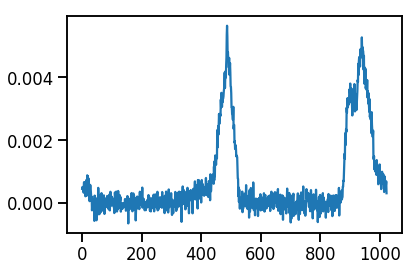

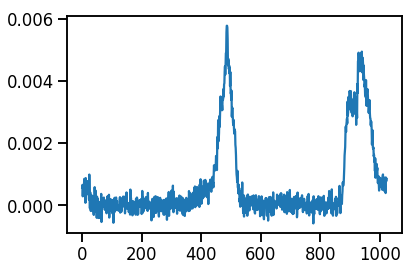

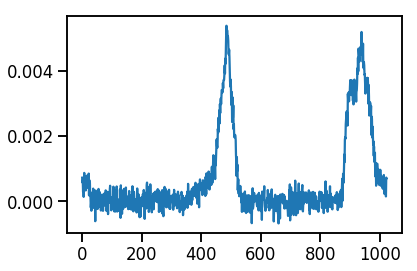

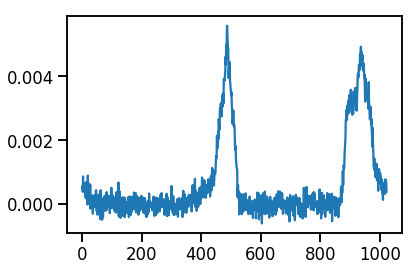

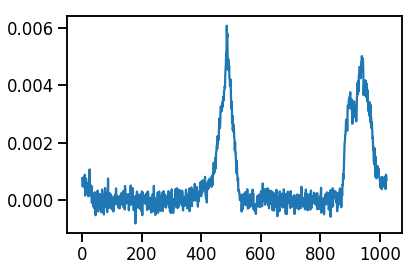

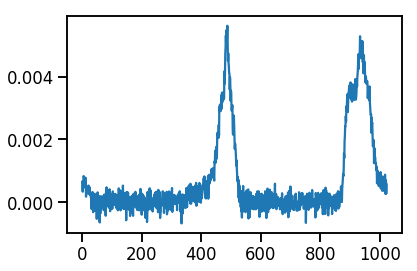

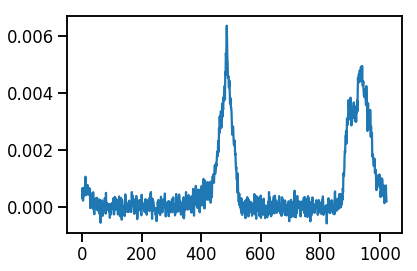

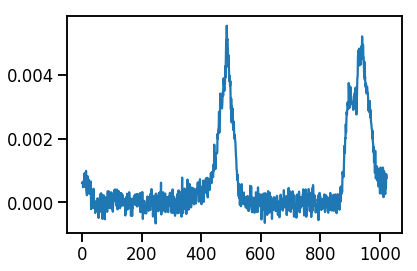

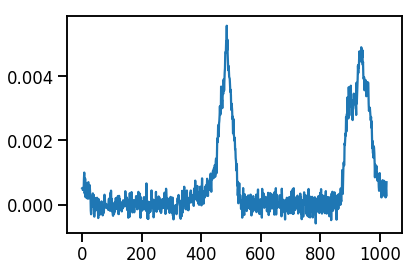

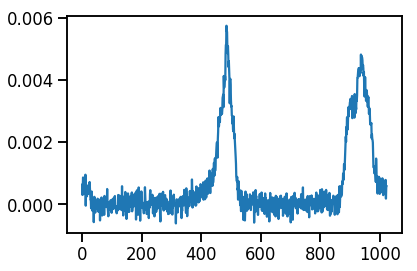

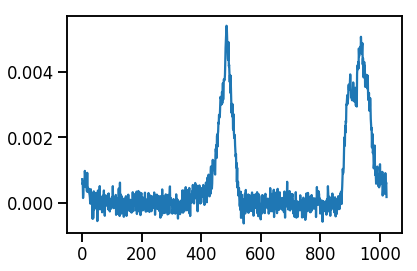

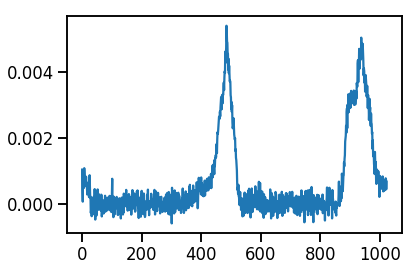

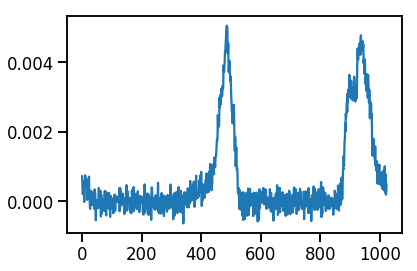

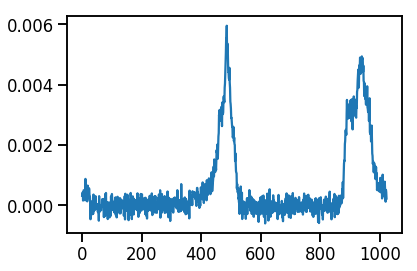

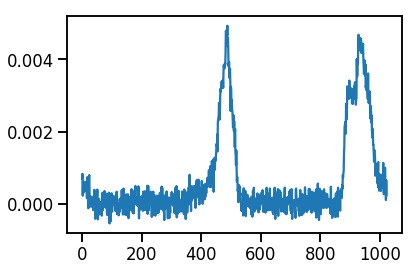

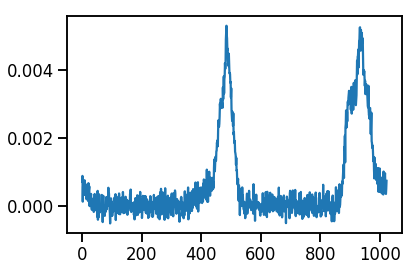

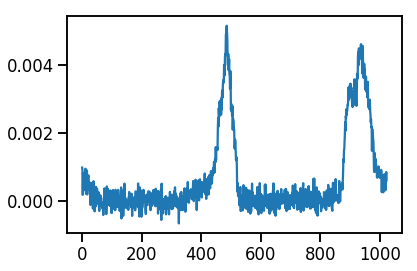

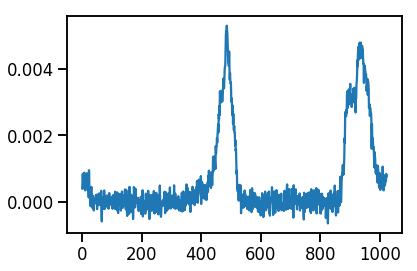

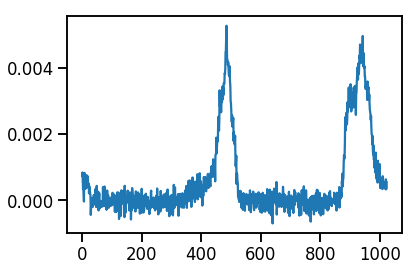

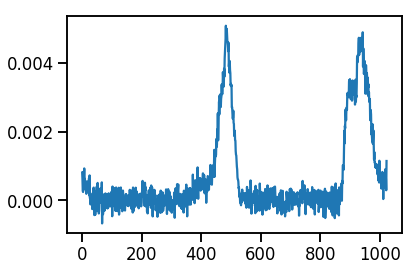

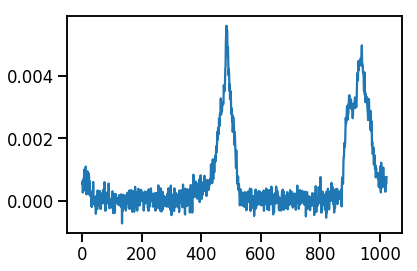

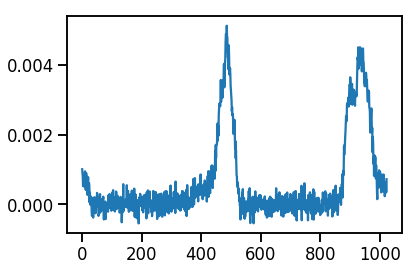

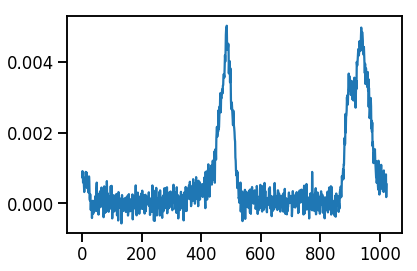

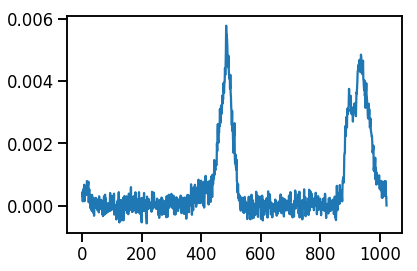

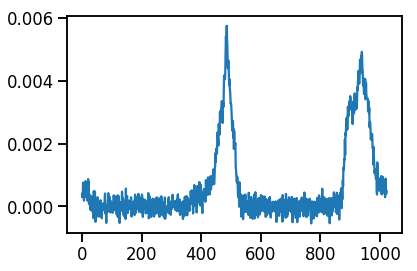

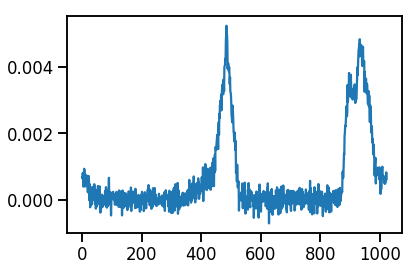

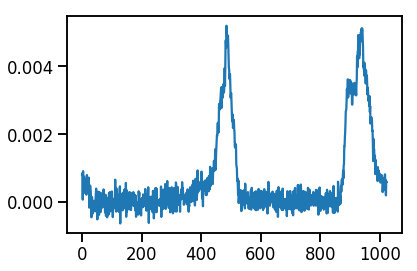

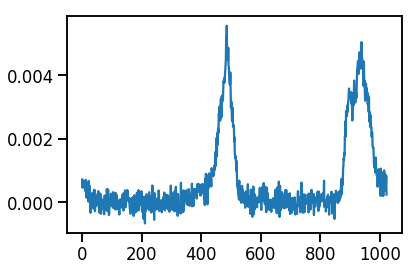

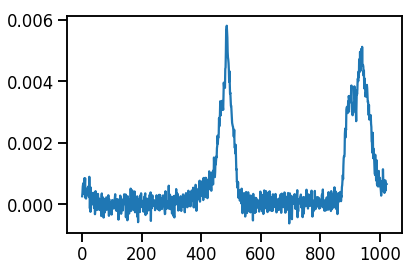

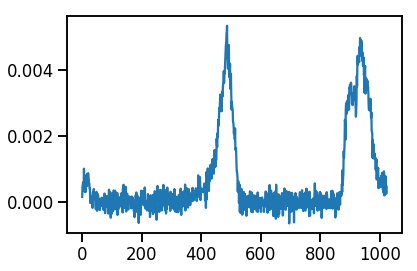

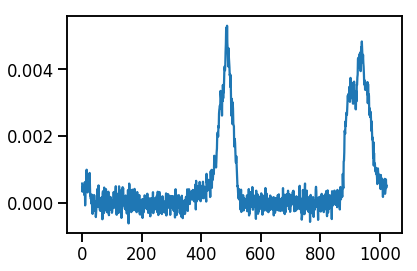

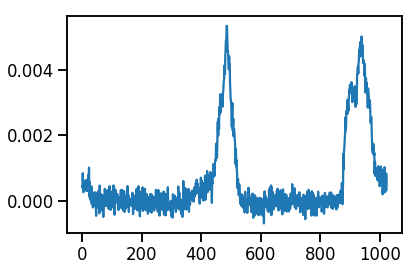

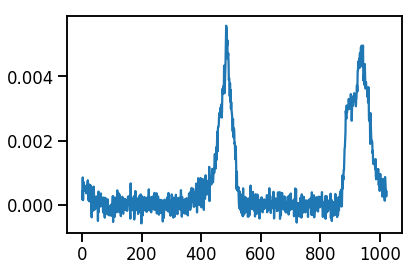

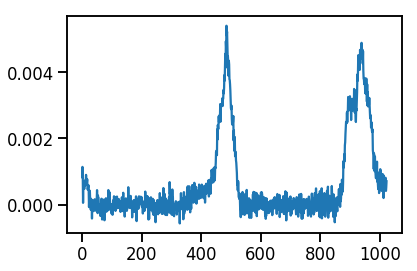

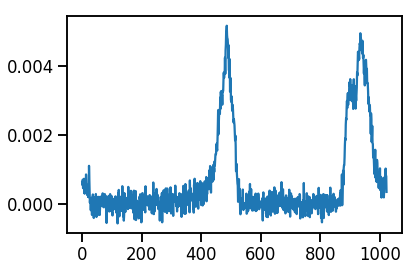

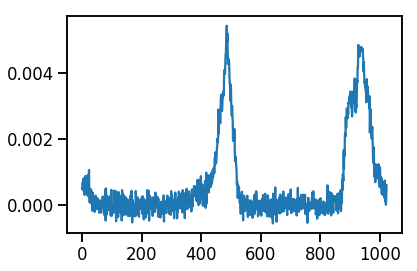

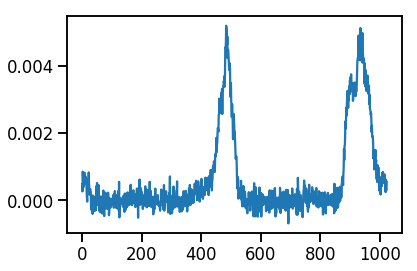

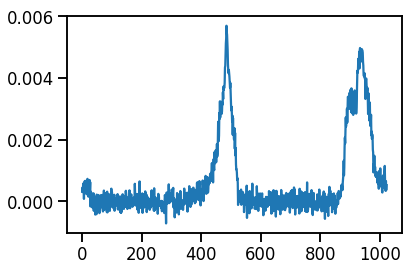

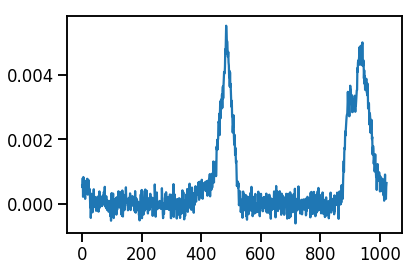

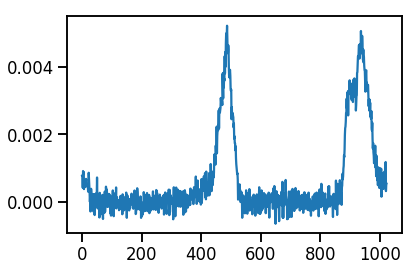

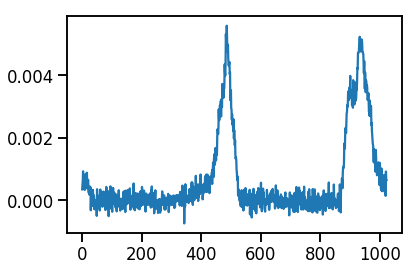

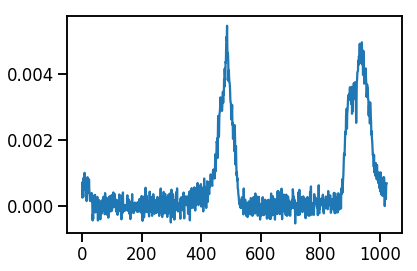

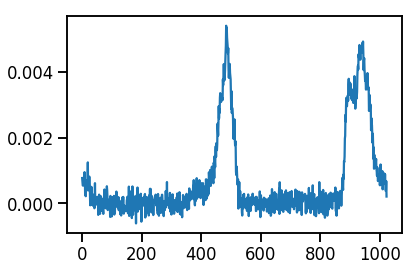

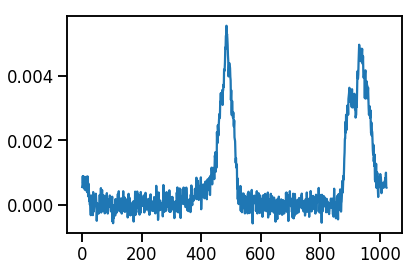

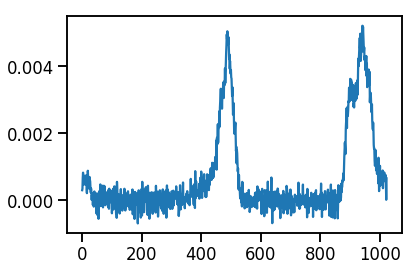

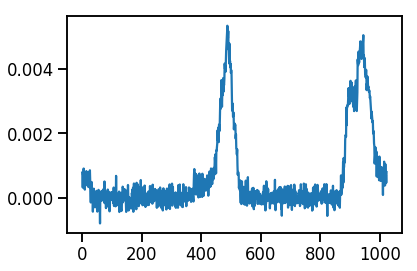

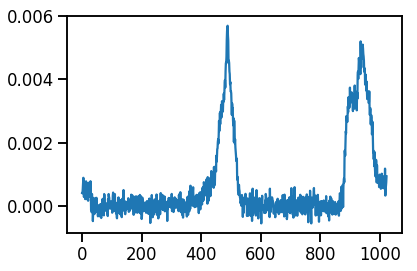

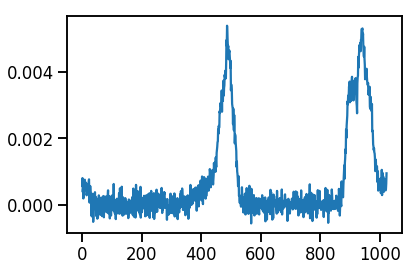

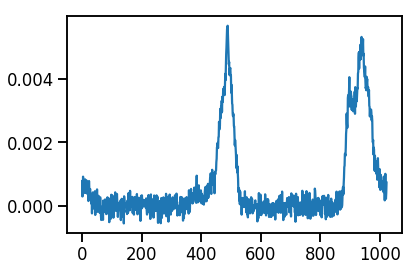

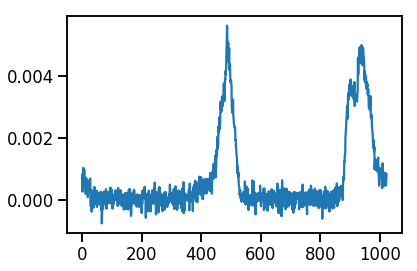

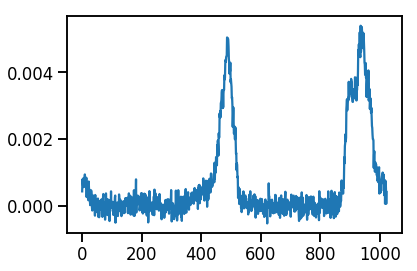

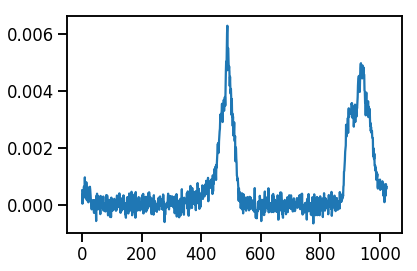

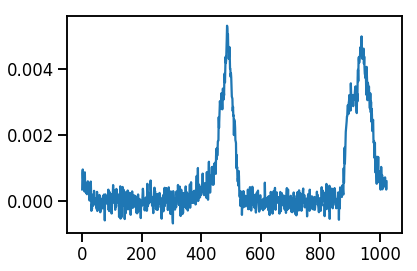

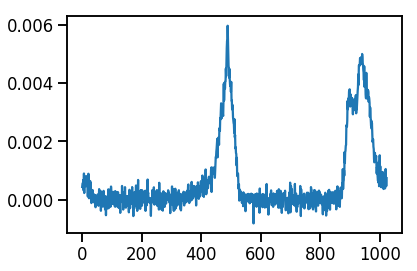

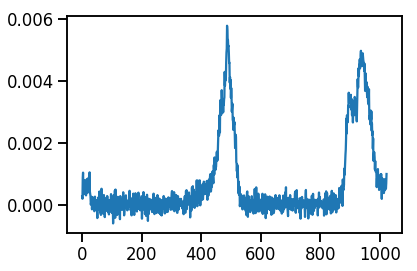

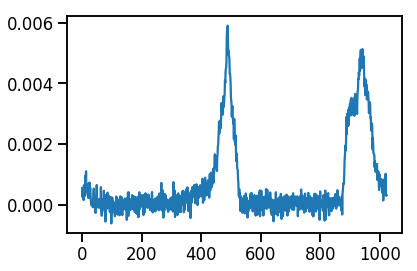

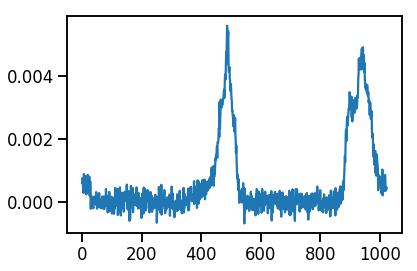

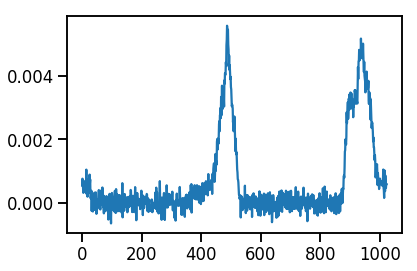

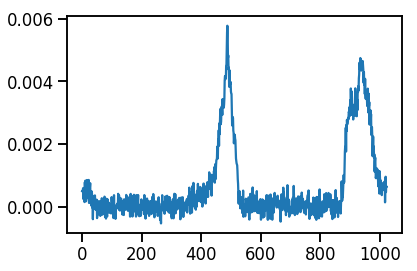

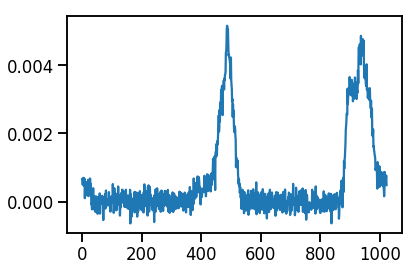

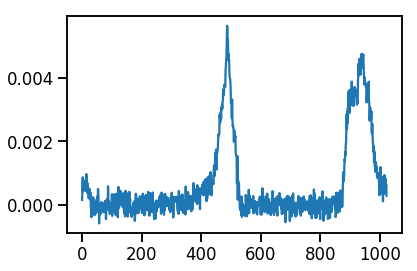

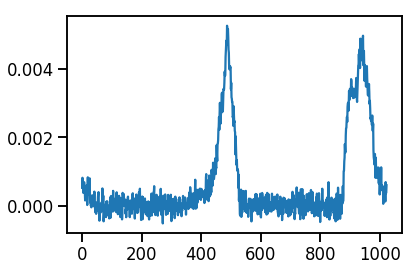

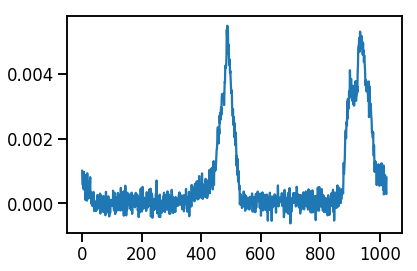

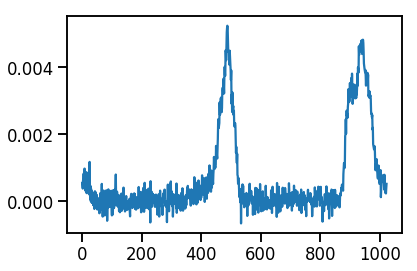

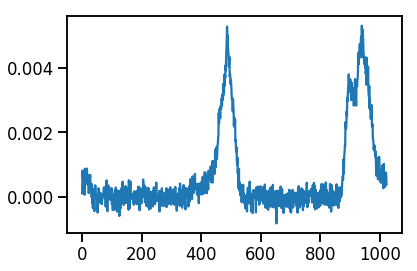

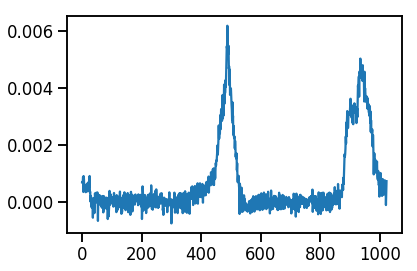

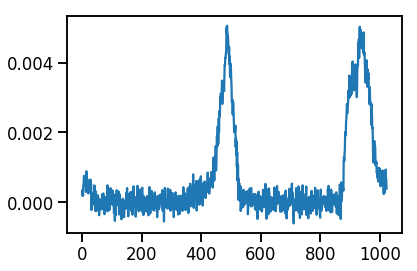

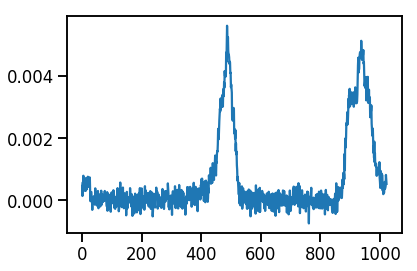

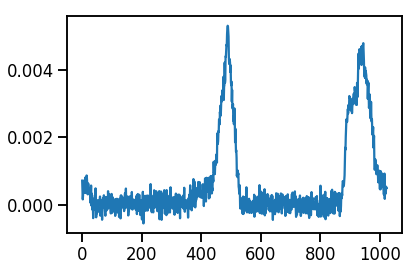

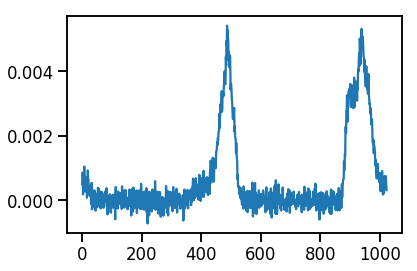

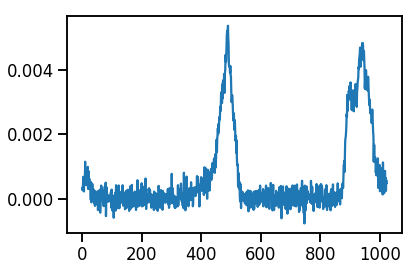

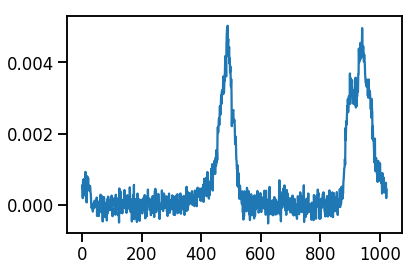

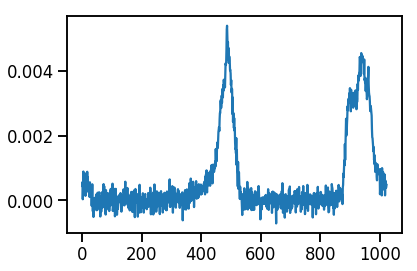

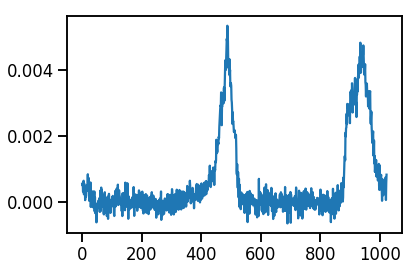

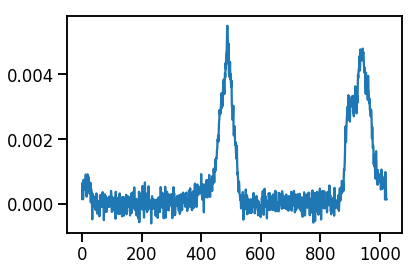

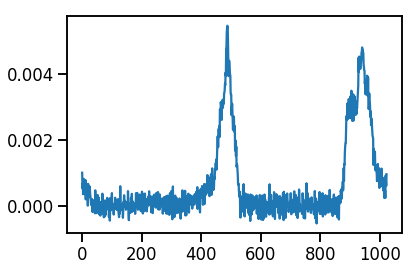

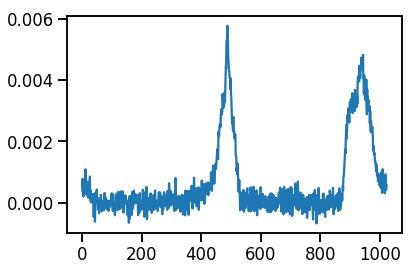

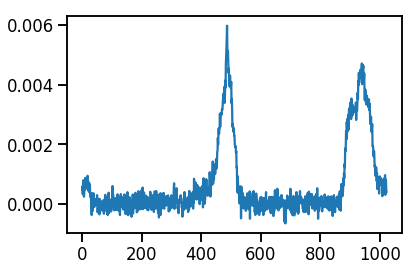

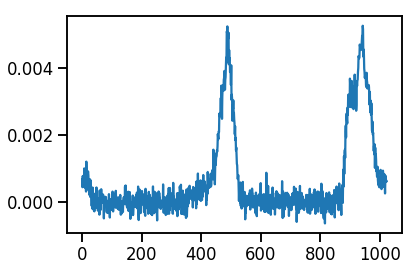

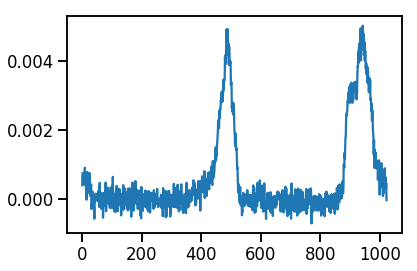

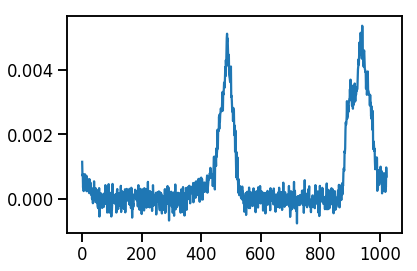

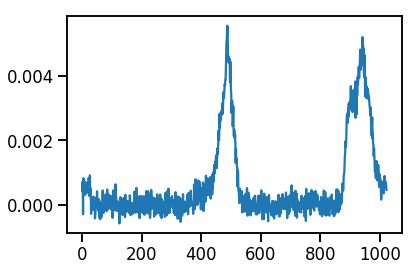

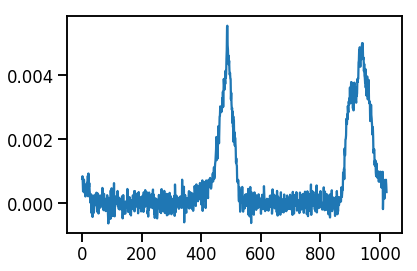

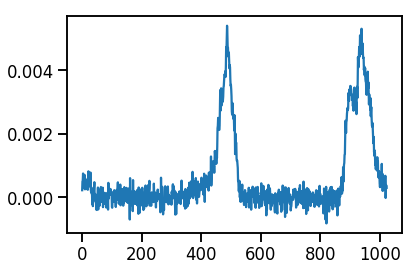

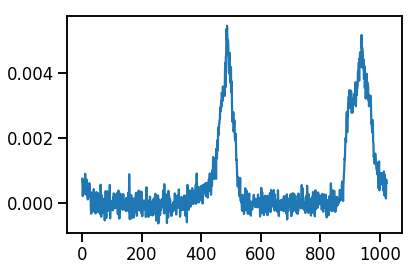

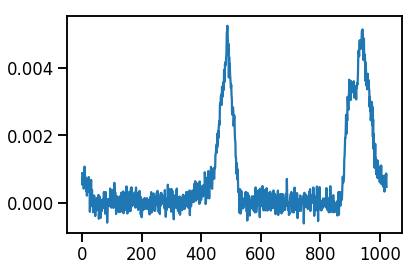

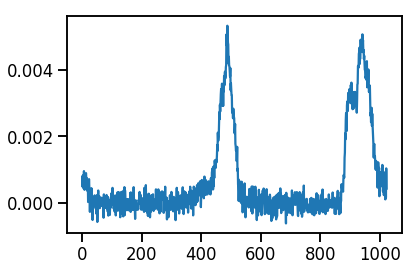

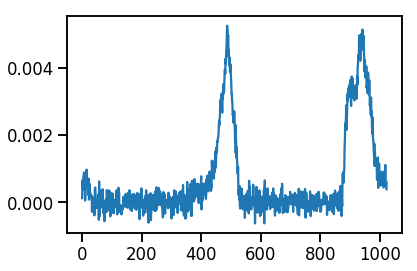

In [44]:
%matplotlib inline
plt.figure()
for i in range(225):    
    plt.plot(data2[i])
    plt.show()
    plt.close()

<IPython.core.display.Javascript object>


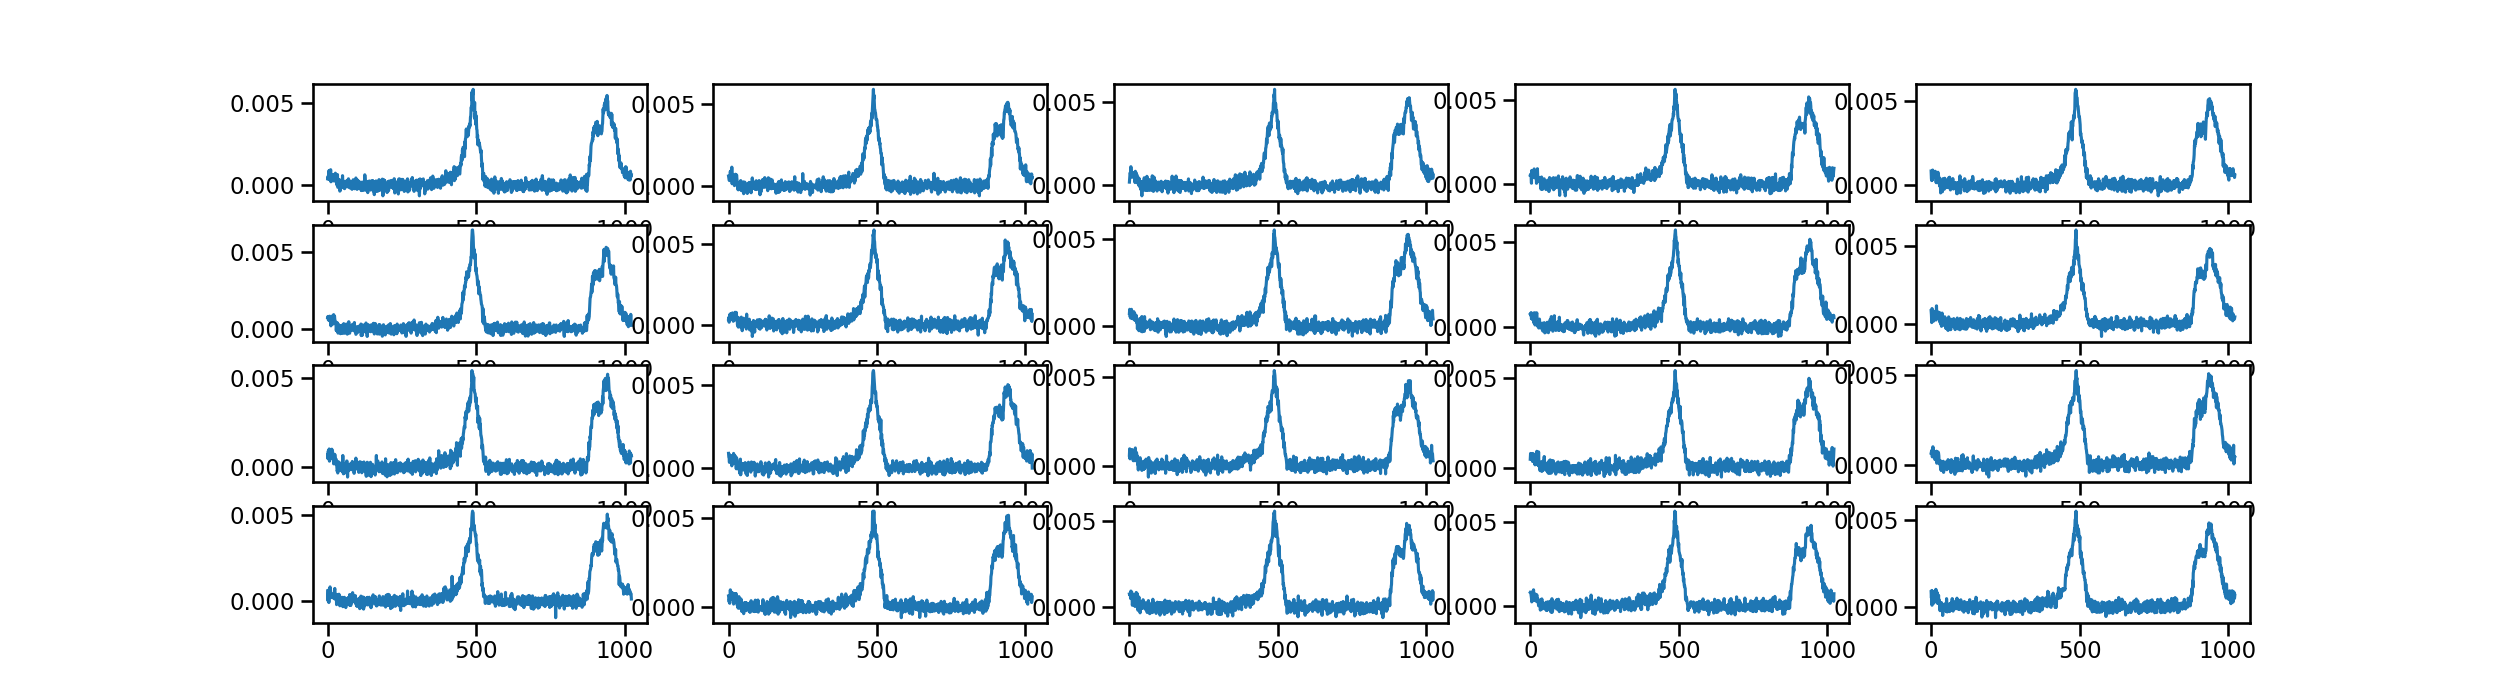

In [28]:
fig, axs = plt.subplots(4,5, figsize=(25,7))
axs=axs.ravel()
for i in range(226):    
    axs[i].plot(data2[10+i])

Text(0.5,0,'Pulse phase')

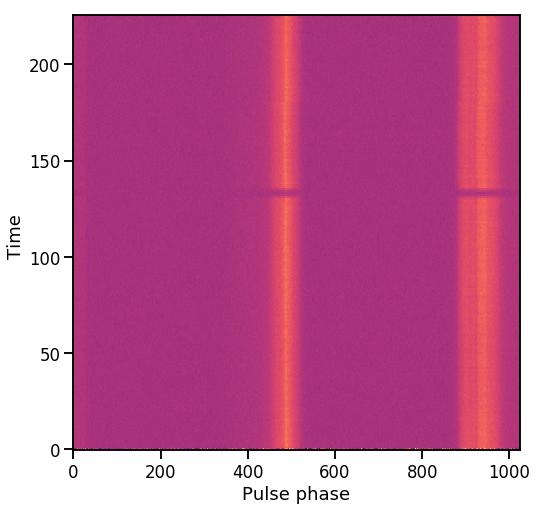

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(data2,aspect='auto', cmap='magma', origin='lower')
plt.ylabel("Time ")
plt.xlabel("Pulse phase")

In [343]:
newdata = '/scratch01/mgeyer/ARIWS/double_pulsar_data/eclipse_data_uhf/search_data/folded_eclipses'
dat='uhf_eclipse.ar.t8'

In [346]:
arch3 = psrchive.Archive_load(os.path.join(newdata,dat))
arch3.remove_baseline()
arch3.dedisperse()
#get_archive_info(arch3)
data3 = arch3.get_data().reshape(657,512)

Text(0.5,0,'Pulse phase')

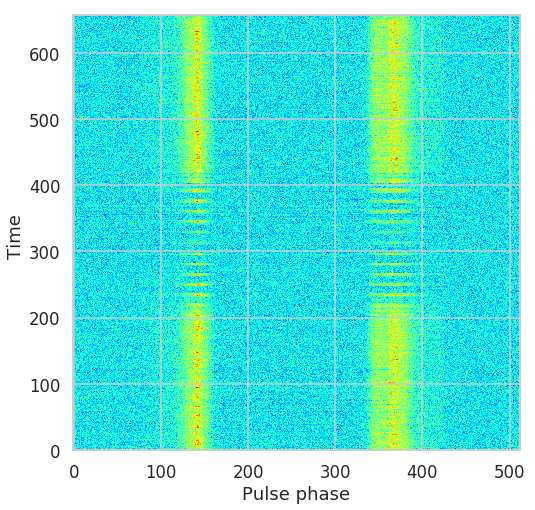

In [347]:
plt.figure(figsize=(8,8))
plt.imshow(data3,aspect='auto', cmap=my_cmap, origin='lower')
plt.ylabel("Time ")
plt.xlabel("Pulse phase")

In [ ]:
## CODEX??

In [ ]:
## http://www.jb.man.ac.uk/~bretonr/doublepulsar/movies/doublepulsar_eclipse.mov

In [1]:
import sys,os
sys.path.insert(0, os.path.abspath('/scratch01/mgeyer/ARIWS/scripts'))
from tools import *

In [2]:
hangman_py2()

What is your name? s
Hello, s Time to play hangman!
What do you think is causing the pulsar light to dim?
Start guessing...
_ _ _ _ _ _ _
guess a character:e
e _ _ _ _ _ e
guess a character:d
Wrong
You have 9 more guesses
e _ _ _ _ _ e
guess a character:c
e c _ _ _ _ e
guess a character:l
e c l _ _ _ e
guess a character:d
Wrong
You have 8 more guesses
e c l _ _ _ e
guess a character:g
Wrong
You have 7 more guesses
e c l _ _ _ e
guess a character:o
Wrong
You have 6 more guesses
e c l _ _ _ e
guess a character:i
e c l i _ _ e
guess a character:p
e c l i p _ e
guess a character:s
e c l i p s e 
That's right! 
Now have a look at http://www.jb.man.ac.uk/~bretonr/doublepulsar/movies/doublepulsar_eclipse.mov to learn more.


In [63]:
# #importing the time module
# import time

# #welcoming the user
# name = raw_input("What is your name? ")

# print "Hello, " + name, "Time to play hangman!"

# print ""

# #wait for 1 second
# time.sleep(1)

# print "Start guessing..."
# time.sleep(0.5)

# #here we set the secret
# word = "secret"

# #creates an variable with an empty value
# guesses = ''

# #determine the number of turns
# turns = 10

# # Create a while loop

# #check if the turns are more than zero
# while turns > 0:         

#     # make a counter that starts with zero
#     failed = 0             

#     # for every character in secret_word    
#     for char in word:      

#     # see if the character is in the players guess
#         if char in guesses:    
    
#         # print then out the character
#             print char,    

#         else:
    
#         # if not found, print a dash
#             print "_",     
       
#         # and increase the failed counter with one
#             failed += 1    

#     # if failed is equal to zero

#     # print You Won
#     if failed == 0:        
#         print "You won"  

#     # exit the script
#         break              

#     print

#     # ask the user go guess a character
#     guess = raw_input("guess a character:") 

#     # set the players guess to guesses
#     guesses += guess                    

#     # if the guess is not found in the secret word
#     if guess not in word:  
 
#      # turns counter decreases with 1 (now 9)
#         turns -= 1        
 
#     # print wrong
#         print "Wrong"    
 
#     # how many turns are left
#         print "You have", + turns, 'more guesses' 
 
#     # if the turns are equal to zero
#         if turns == 0:           
    
#         # print "You Lose"
#             print "You Lose"



In [10]:
def get_archive_info(archive):
   """Query archive attributes.
   Input:
       archive: loaded PSRCHIVE archive object.
   Output:
       Print attributes of the archive.
   """
   filename = archive.get_filename()
   nbin = archive.get_nbin()
   nchan = archive.get_nchan()
   npol = archive.get_npol()
   nsubint = archive.get_nsubint()
   obs_type = archive.get_type()
   telescope_name = archive.get_telescope()
   source_name = archive.get_source()
   ra = archive.get_coordinates().ra()
   dec = archive.get_coordinates().dec()
   centre_frequency = archive.get_centre_frequency()
   bandwidth = archive.get_bandwidth()
   DM = archive.get_dispersion_measure()
   RM = archive.get_rotation_measure()
   is_dedispersed = archive.get_dedispersed()
   is_faraday_rotated = archive.get_faraday_corrected()
   is_pol_calib = archive.get_poln_calibrated()
   data_units = archive.get_scale()
   data_state = archive.get_state()
   obs_duration = archive.integration_length()
   obs_start = archive.start_time().fracday() + archive.start_time().intday()
   obs_end = archive.end_time().fracday() + archive.end_time().intday()
   receiver_name = archive.get_receiver_name()
   receptor_basis = archive.get_basis()
   backend_name = archive.get_backend_name()
   backend_delay = archive.get_backend_delay()
   # low_freq = archive.get_centre_frequency() - archive.get_bandwidth() / 2.0
   # high_freq = archive.get_centre_frequency() + archive.get_bandwidth() / 2.0
   print 'file             Name of the file                           %s' % filename
   print 'nbin             Number of pulse phase bins                 %s' % nbin
   print 'nchan            Number of frequency channels               %s' % nchan
   print 'npol             Number of polarizations                    %s' % npol
   print 'nsubint          Number of sub-integrations                 %s' % nsubint
   print 'type             Observation type                           %s' % obs_type
   print 'site             Telescope name                             %s' % telescope_name
   print 'name             Source name                                %s' % source_name
   print 'coord            Source coordinates                         %s%s' % (ra.getHMS(), dec.getDMS())
   print 'freq             Centre frequency (MHz)                     %s' % centre_frequency
   print 'bw               Bandwidth (MHz)                            %s' % bandwidth
   print 'dm               Dispersion measure (pc/cm^3)               %s' % DM
   print 'rm               Rotation measure (rad/m^2)                 %s' % RM
   print 'dmc              Dispersion corrected                       %s' % is_dedispersed
   print 'rmc              Faraday Rotation corrected                 %s' % is_faraday_rotated
   print 'polc             Polarization calibrated                    %s' % is_pol_calib
   print 'scale            Data units                                 %s' % data_units
   print 'state            Data state                                 %s' % data_state
   print 'length           Observation duration (s)                   %s' % obs_duration
   print 'start            Observation start (MJD)                    %.10f' % obs_start
   print 'end              Observation end (MJD)                      %.10f' % obs_end
   print 'rcvr:name        Receiver name                              %s' % receiver_name
   print 'rcvr:basis       Basis of receptors                         %s' % receptor_basis
   print 'be:name          Name of the backend instrument             %s' % backend_name
   print 'be:delay         Backend propn delay from digi. input.      %s\n' % backend_delay



# J0737-3039A

In [2]:
def sortglob(x):
    return sorted(glob.glob(x))

In [ ]:
# Eclipse times


# Note: 
# # the double pulsar block should preferably be started between 05:33 - 05:43.
# # it should not be be started after 05:50 - rather reschedule should the start be so delayed.



# # eclipse times
# 2019-10-27-05:53
# 2019-10-27-08:20

# eclipse times 2019-07-20 06:29:48.285 and 2019-07-20 08:57:02.761.

In [10]:
data_path = '/scratch01/mgeyer/ARIWS/double_pulsar_data/'
eclipse_data = '/scratch01/mgeyer/ARIWS/double_pulsar_data/eclipse_data/decimated'

In [11]:
os.chdir(eclipse_data)
!ls

J0737-3039A_2019-10-27-05:47:12_zap.f128t128p.ar
J0737-3039A_2019-10-27-05:47:12_zap.f128t8p.ar
J0737-3039A_2019-10-27-05:47:12_zap.f64t8.ar
J0737-3039A_2019-10-27-05:47:12_zap.f64t8p.ar
J0737-3039A_2019-10-27-05:47:12_zap.Fp.ar
J0737-3039A_2019-10-27-05:47:12_zap.Fpt4.ar
J0737-3039A_2019-10-27-05:47:12_zap.FT.ar
J0737-3039A_2019-10-27-05:47:12_zap.FTp.ar
J0737-3039A_2019-10-27-05:47:12_zap.t16f16p.ar
J0737-3039A_2019-10-27-05:47:12_zap.Tp.ar


In [33]:
arch = psrchive.Archive_load('J0737-3039A_2019-10-27-05:47:12_zap.Tp.ar')
arch.remove_baseline()

In [34]:
psru.get_archive_info(arch)

file             Name of the file                           J0737-3039A_2019-10-27-05:47:12_zap.Tp.ar
nbin             Number of pulse phase bins                 1024
nchan            Number of frequency channels               928
npol             Number of polarizations                    1
nsubint          Number of sub-integrations                 1
type             Observation type                           Pulsar
site             Telescope name                             MeerKAT
name             Source name                                J0737-3039A
coord            Source coordinates                         07:37:51.248-30:39:40.705
freq             Centre frequency (MHz)                     1283.58203125
bw               Bandwidth (MHz)                            775.75
dm               Dispersion measure (pc/cm^3)               48.912718
rm               Rotation measure (rad/m^2)                 0.0
dmc              Dispersion corrected                       False
rmc        

In [35]:
data = psru.apply_freq_weights(arch).reshape(928,1024)

Archive loaded to apply weights has:

928 freq chan
1 subints
1024 phase bins
1 polarisations
This function applies weights to t-scrunched, p-scrunched data - for now


In [31]:
##plt.plot(data)

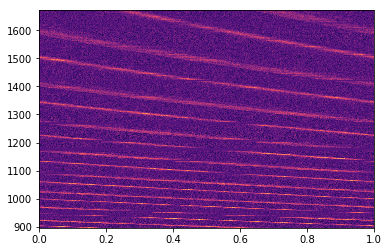

In [37]:
freqs = arch.get_frequencies()
plt.imshow(data,extent=(0,1,freqs[0],freqs[-1]), aspect='auto', cmap='magma', origin='lower')

In [39]:
arch.dedisperse()
data = psru.apply_freq_weights(arch).reshape(928,1024)

Archive loaded to apply weights has:

928 freq chan
1 subints
1024 phase bins
1 polarisations
This function applies weights to t-scrunched, p-scrunched data - for now


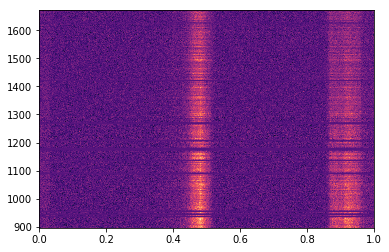

In [40]:
freqs = arch.get_frequencies()
plt.imshow(data,extent=(0,1,freqs[0],freqs[-1]), aspect='auto', cmap='magma', origin='lower')

In [41]:
!ls

J0737-3039A_2019-10-27-05:47:12_zap.f128t128p.ar
J0737-3039A_2019-10-27-05:47:12_zap.f128t8p.ar
J0737-3039A_2019-10-27-05:47:12_zap.f64t8.ar
J0737-3039A_2019-10-27-05:47:12_zap.f64t8p.ar
J0737-3039A_2019-10-27-05:47:12_zap.Fp.ar
J0737-3039A_2019-10-27-05:47:12_zap.Fpt4.ar
J0737-3039A_2019-10-27-05:47:12_zap.FT.ar
J0737-3039A_2019-10-27-05:47:12_zap.FTp.ar
J0737-3039A_2019-10-27-05:47:12_zap.t16f16p.ar
J0737-3039A_2019-10-27-05:47:12_zap.Tp.ar


In [59]:
arch2 = psrchive.Archive_load('J0737-3039A_2019-10-27-05:47:12_zap.Fp.ar')
arch2.remove_baseline()
arch2.dedisperse()
arch2.remove_baseline()

In [54]:
psru.get_archive_info(arch2)

file             Name of the file                           J0737-3039A_2019-10-27-05:47:12_zap.Fp.ar
nbin             Number of pulse phase bins                 1024
nchan            Number of frequency channels               1
npol             Number of polarizations                    1
nsubint          Number of sub-integrations                 226
type             Observation type                           Pulsar
site             Telescope name                             MeerKAT
name             Source name                                J0737-3039A
coord            Source coordinates                         07:37:51.248-30:39:40.705
freq             Centre frequency (MHz)                     1283.58203125
bw               Bandwidth (MHz)                            775.75
dm               Dispersion measure (pc/cm^3)               48.912718
rm               Rotation measure (rad/m^2)                 0.0
dmc              Dispersion corrected                       True
rmc         

In [55]:
data = arch2.get_data().reshape(226,1024)

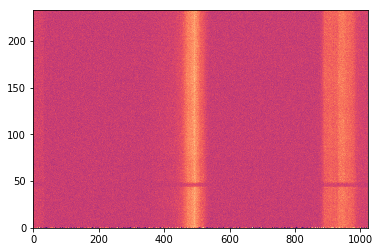

In [60]:
plt.imshow(data, aspect='auto',extent=(0,1023,0,233),cmap='magma', origin='lower')

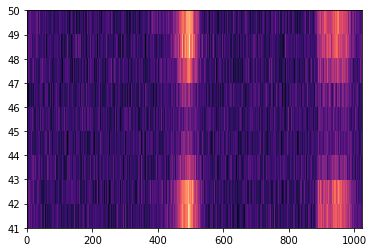

In [66]:
a, b = 41, 50
plt.imshow(data[a:b,:], aspect='auto',extent=(0,1023,a,b),cmap='magma', origin='lower')

In [ ]:
## 6 subints = 50 seconds

In [67]:
## length = 1800 sec
## subint = 226 
!pwd

/scratch01/mgeyer/ARIWS/double_pulsar_data/eclipse_data/decimated


In [68]:
# Search data from 2019-07-20
os.chdir('/scratch01/mgeyer/ARIWS/double_pulsar_data/eclipse_data/search_data/2019-07-20/')

In [69]:
!ls

eclipse.zap.RMFt16S   eclipse.zap.RMFt32S  eclipse.zap.RMFt8_alt
eclipse.zap.RMFt256   eclipse.zap.RMFt64   eclipse.zap.RMFt8S_m112
eclipse.zap.RMFt256S  eclipse.zap.RMFt64S  eclipse.zap.RMFt8S_p112
eclipse.zap.RMFt32    eclipse.zap.RMFt8    rsync_command.list


In [81]:
arch = psrchive.Archive_load('eclipse.zap.RMFt32')
psru.get_archive_info(arch)

file             Name of the file                           eclipse.zap.RMFt32
nbin             Number of pulse phase bins                 1024
nchan            Number of frequency channels               1
npol             Number of polarizations                    4
nsubint          Number of sub-integrations                 248
type             Observation type                           Pulsar
site             Telescope name                             MeerKAT
name             Source name                                0737-3039A
coord            Source coordinates                         00:00:00.000+00:00:00.000
freq             Centre frequency (MHz)                     1283.582
bw               Bandwidth (MHz)                            642.0
dm               Dispersion measure (pc/cm^3)               48.912718
rm               Rotation measure (rad/m^2)                 112.0
dmc              Dispersion corrected                       True
rmc              Faraday Rotation correc

In [85]:
nbin = arch.get_nbin()
nsub = arch.get_nsubint()
arch.pscrunch()
arch.remove_baseline()

In [86]:
data = arch.get_data().reshape(nsub,nbin)

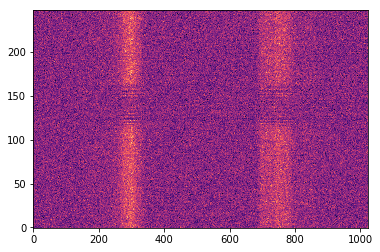

In [87]:
plt.imshow(data, aspect='auto',cmap='magma', origin='lower')

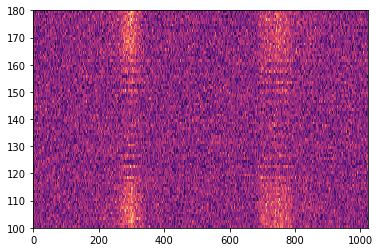

In [89]:
a, b = 100, 180
plt.imshow(data[a:b,:], aspect='auto',extent=(0,1023,a,b),cmap='magma', origin='lower')

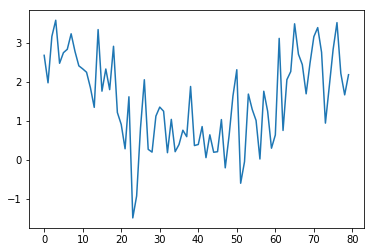

In [90]:
plt.plot(np.sum(data[a:b,:], axis=1))

In [101]:
# Search data from 2019-07-20
os.chdir('/scratch01/mgeyer/ARIWS/double_pulsar_data/eclipse_data/search_data/2019-08-28/')
!ls

combine.zzRFt8S  combine.zzRFt8S.rot  rsync_command.list


In [102]:
arch = psrchive.Archive_load('combine.zzRFt8S.rot')
psru.get_archive_info(arch)

file             Name of the file                           combine.zzRFt8S.rot
nbin             Number of pulse phase bins                 1024
nchan            Number of frequency channels               1
npol             Number of polarizations                    4
nsubint          Number of sub-integrations                 686
type             Observation type                           Pulsar
site             Telescope name                             MeerKAT
name             Source name                                0737-3039A
coord            Source coordinates                         00:00:00.000+00:00:00.000
freq             Centre frequency (MHz)                     1283.582
bw               Bandwidth (MHz)                            642.0
dm               Dispersion measure (pc/cm^3)               48.912718
rm               Rotation measure (rad/m^2)                 112.0
dmc              Dispersion corrected                       True
rmc              Faraday Rotation corre

In [103]:
arch.pscrunch()
arch.remove_baseline()
arch.tscrunch_to_nsub(228)

nbin = arch.get_nbin()
nsub = arch.get_nsubint()

In [104]:
data = arch.get_data().reshape(nsub,nbin)

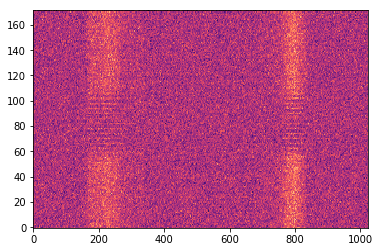

In [105]:
plt.imshow(data, aspect='auto',cmap='magma', origin='lower')

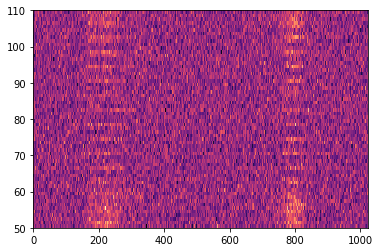

In [109]:
a, b = 50, 110
plt.imshow(data[a:b,:], aspect='auto',extent=(0,1023,a,b),cmap='magma', origin='lower')

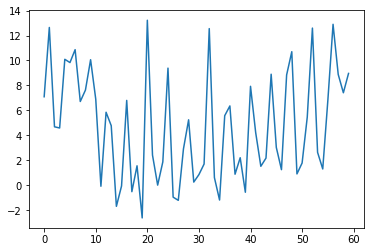

In [110]:
plt.plot(np.sum(data[a:b,:], axis=1))

In [116]:
os.chdir("/scratch01/mgeyer/ARIWS/double_pulsar_data/eclipse_data/for_census_paper/")

In [119]:
# import numpy as np
# from scipy import interp, interpolate
# import psrchive
# import matplotlib.pyplot as plt
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# plt.rcParams['xtick.labelsize']=12
# plt.rcParams['ytick.labelsize']=12
# import cmasher as cmr

# # Get interpolated orbital phase at the start/end from topo/bary-crentric times
# # & orbital phases sent by VVK
# lband_vals = np.genfromtxt("L-band.times", dtype=np.float64)
# uht_vals = np.genfromtxt("UHF.times", dtype=np.float64)

# lband_start, lband_finish = interp([np.float64(58684.372254407851929),
#     np.float64(58684.373870566042143)], [np.float64(lband_vals[0,0]),
#     np.float64(lband_vals[-1,0])], [np.float64(lband_vals[0,-1]),
#     np.float64(lband_vals[-1,-1])])

# uhf_start, uhf_finish = interp([np.float64(58928.846796118672086),
#     np.float64(58928.848174559624360)], [np.float64(uht_vals[0,0]),
#     np.float64(uht_vals[-1,0])], [np.float64(uht_vals[0,-1]),
#     np.float64(uht_vals[-1,-1])])

# # Load L-band eclipse
# Lband_archive = psrchive.Archive_load("eclipse.zap.RMFt8")
# Lband_archive.remove_baseline()
# Lband_archive.dedisperse()
# Lband_archive.pscrunch()
# Lband_archive.fscrunch()

# # Load UHF-band eclipse
# UHF_archive = psrchive.Archive_load("uhf_eclipse.par.t8")
# UHF_archive.remove_baseline()
# UHF_archive.dedisperse()
# UHF_archive.pscrunch()
# UHF_archive.fscrunch()

# # Get L-band & UHF data
# Lband_data = np.flip(Lband_archive.get_data()[:,0,0,:], axis=0)
# UHF_data = np.flip(UHF_archive.get_data()[:,0,0,:], axis=0)

# # Pulse phase
# phase = np.linspace(0, 1023./1024, 1024)

# # Get the interpolated orbital phases
# Lband_orb_phase = np.linspace(lband_start, lband_finish,
#     np.shape(Lband_data)[0])
# UHF_orb_phase = np.linspace(uhf_start, uhf_finish, np.shape(UHF_data)[0])

# # Make the plot!
# font = 12

# fig  = plt.figure(figsize=(9,6))
# grid = plt.GridSpec(6, 8, wspace=0.4)

# L_ax = fig.add_subplot(grid[:,0:4])
# U_ax = fig.add_subplot(grid[:,4:], sharey=L_ax)

# L_ax.imshow(Lband_data, aspect="auto",
#     extent=(0, 1, Lband_orb_phase[0], Lband_orb_phase[-1]),
#     cmap=cmr.toxic)
# #L_ax.set_ylim(88.2, 91.2)
# L_ax.set_ylim(89, 91)
# L_ax.axhline(90  - 0.0391*1.544, ls="--", color="w", lw=1)
# L_ax.set_ylabel("Orbital phase (deg)", fontsize=font)
# L_ax.set_xlabel("Pulse phase", fontsize=font)
# L_ax.set_title("L-band", fontsize=font+2)
# L_ax.tick_params(axis="both", bottom=True, top=False, left=True, right=False,
#         direction="out", labelbottom=True)

# U_ax.imshow(UHF_data, aspect="auto",
#     extent=(0, 1, UHF_orb_phase[0], UHF_orb_phase[-1]),
#     cmap=cmr.toxic)
# #U_ax.set_ylim(88.2, 91.2)
# U_ax.set_ylim(89, 91)
# U_ax.axhline(90 - 0.0405* 1.518, ls="--", color="w", lw=1)
# U_ax.set_xlabel("Pulse phase", fontsize=font)
# U_ax.set_title("UHF-band", fontsize=font+2)
# U_ax.tick_params(axis="both", bottom=True, top=False, left=False, right=False,
#         direction="out", labelbottom=True, labelleft=False)

# plt.tight_layout()
# #plt.savefig("J0737_Lband_UHF_eclipse.pdf", dpi=300)
# #plt.show()
# #plt.close()

In [ ]:
   fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
        fig.subplots_adjust(hspace=0)
        ax1.plot(phase_values, plot_profile[0,0,0,:], label='SNR = %.2f'%(snr))

        #ax1.fill_betweenx(y=[np.min(plot_profile[0,0,0,:]),np.max(plot_profile[0,0,0,:])], x1=ph_lim0,x2=ph_lim1, alpha=0.4, color='b')
        #ax1.fill_betweenx(y=[np.min(plot_profile[0,0,0,:]),np.max(plot_profile[0,0,0,:])], x1=ph_lim2,x2=ph_lim3, alpha=0.4, color='b')
        #ax1.axvline(x=ph_lim0, color='r', alpha=0.2, lw=2.0)
        #ax1.axvline(x=ph_lim1, color='r', alpha=0.2, lw=2.0)
        #ax1.axvline(x=ph_lim2, ls='dashed',alpha=0.2)
        #ax1.axvline(x=ph_lim3, ls='dashed',alpha=0.2)
        ax1.axvline(x=phase_max, ls='dotted',alpha=0.3)

        ax1.set_title((os.path.basename(args.directory_name),snr_file),fontsize=10) ###
        ax1.set_ylabel('Intensity', fontsize=10)
        ax1.legend(loc='best')
        spec_data = freq_data.reshape(nchan,nbin)

        data_weighted = np.ones((nchan, nbin))
        for n in range(nchan):
            data_weighted[n] =  weights[n]*spec_data[n,:]

        lower_freq = archive_file.get_centre_frequency() - archive_file.get_bandwidth()/2.0
        high_freq = archive_file.get_centre_frequency() + archive_file.get_bandwidth()/2.0
        min_phase = 0
        max_phase = 1
        if args.directory_name.endswith("/"):
            saven = os.path.basename(args.directory_name[0:-1])
        else:
            saven = os.path.basename(args.directory_name)
        figname = '%s_%s_SNR_%.2f_phase_%.2f.png' %(saven,snr_file, snr, phase_max)
        ax2.imshow(data_weighted, extent=(min_phase,max_phase,lower_freq, high_freq), aspect='auto', cmap='magma', origin='lower')
        ax2.set_xlabel('Pulse Phase', fontsize=10)
        ax2.set_ylabel('Frequency (MHz)',fontsize=10)
        #ax2.tick_params(axis='both', which='minor', labelsize=6)
        ax3 = ax2.twinx()
        ax3.set_ylim(0,nchan)
        ax3.set_ylabel('Channel Number')
        plt.rcParams.update({'figure.max_open_warning': 0})
        plt.savefig(os.path.join(figpath, figname))

In [4]:
def mass_function(inc,m1,m2):
    #m1 -- mass white dwarf/companion
    #m2 -- mass pulsar/NS
    deg2rad = inc*np.pi/180.0
    mf = (m1*np.sin(inc))**3/(m2+m1)**2
    return mf

In [5]:
mass_function(72,0.9,0.27)

0.008708644962585443

In [ ]:
# Search data for this eclipse 2019-10-27-08:20